In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [4]:
data = pd.read_csv('./Data/us_equities_news_dataset.csv')

In [5]:
d_cropped = data[['ticker', 'title', 'release_date']].copy()

In [6]:
import pysentiment2 as ps

hiv4 = ps.HIV4()
lm = ps.LM()


In [7]:
merged_title = d_cropped.groupby(['ticker', 'release_date'], as_index = False).agg({'title': ' '.join})
merged_title['hiv4_token'] = [hiv4.tokenize(x) for x in merged_title.title]
merged_title['hiv4_score'] = [hiv4.get_score(x) for x in merged_title.hiv4_token]
merged_title

,ticker,release_date,title,hiv4_token,hiv4_score
0,A,2012-07-13,Important Step Backwards For Pension Reforms I...,"[import, step, backward, pension, reform]","{'Positive': 1, 'Negative': 1, 'Polarity': 0.0..."
1,A,2012-07-15,A Look At Forecasts For Peak Oil And The End...,"[look, forecast, oil, end, civil]","{'Positive': 1, 'Negative': 0, 'Polarity': 0.9..."
2,A,2012-07-20,USD CHF In Final Leg Of A Wave 3 Targets At 0 ...,"[usd, chf, final, leg, wave, target]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
3,A,2012-07-26,The Euro As The SDR Of Europe,[sdr],"{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
4,A,2012-07-31,Elliott Wave GBP USD Big Picture,"[wave, gbp, usd, big, pictur]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
...,...,...,...,...,...
120192,ZION,2019-11-19,Why Is Zions ZION Up 2 5 Since Last Earning...,"[zion, zion, earn, report]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0..."
120193,ZION,2019-12-02,Zions ZION Stock Rallies 22 2 YTD Is More ...,"[zion, zion, ralli, ytd, upsid, left]","{'Positive': 2, 'Negative': 0, 'Polarity': 0.9..."
120194,ZION,2020-01-14,Zions ZION Expected To Beat Earnings Estimat...,"[zion, zion, expect, beat, earn, estim, know, ...","{'Positive': 1, 'Negative': 1, 'Polarity': 0.0..."
120195,ZION,2020-01-21,Zions ZION Q4 Earnings Beat Estimates Despit...,"[zion, zion, q, earn, beat, estim, despit, hig...","{'Positive': 0, 'Negative': 2, 'Polarity': -0...."


In [8]:
merged_title['polarity'] = [x['Polarity'] for x in merged_title.hiv4_score.values]
merged_title['subjectivity'] = [x['Subjectivity'] for x in merged_title.hiv4_score.values]
merged_title['positivity'] = [x['Positive']/(x['Positive'] + x['Negative']) for x in merged_title.hiv4_score.values]
merged_title['negativity'] = [x['Negative']/(x['Positive'] + x['Negative']) for x in merged_title.hiv4_score.values]
merged_title.positivity = merged_title.positivity.fillna(0)
merged_title.negativity = merged_title.negativity.fillna(0)
merged_title

<ipython-input-8-b78f1df2f0ec>:3: RuntimeWarning: invalid value encountered in long_scalars
  merged_title['positivity'] = [x['Positive']/(x['Positive'] + x['Negative']) for x in merged_title.hiv4_score.values]
<ipython-input-8-b78f1df2f0ec>:3: RuntimeWarning: invalid value encountered in double_scalars
  merged_title['positivity'] = [x['Positive']/(x['Positive'] + x['Negative']) for x in merged_title.hiv4_score.values]
<ipython-input-8-b78f1df2f0ec>:4: RuntimeWarning: invalid value encountered in long_scalars
  merged_title['negativity'] = [x['Negative']/(x['Positive'] + x['Negative']) for x in merged_title.hiv4_score.values]
<ipython-input-8-b78f1df2f0ec>:4: RuntimeWarning: invalid value encountered in double_scalars
  merged_title['negativity'] = [x['Negative']/(x['Positive'] + x['Negative']) for x in merged_title.hiv4_score.values]


,ticker,release_date,title,hiv4_token,hiv4_score,polarity,subjectivity,positivity,negativity
0,A,2012-07-13,Important Step Backwards For Pension Reforms I...,"[import, step, backward, pension, reform]","{'Positive': 1, 'Negative': 1, 'Polarity': 0.0...",0.000000,0.400000,0.5,0.5
1,A,2012-07-15,A Look At Forecasts For Peak Oil And The End...,"[look, forecast, oil, end, civil]","{'Positive': 1, 'Negative': 0, 'Polarity': 0.9...",0.999999,0.200000,1.0,0.0
2,A,2012-07-20,USD CHF In Final Leg Of A Wave 3 Targets At 0 ...,"[usd, chf, final, leg, wave, target]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000,0.000000,0.0,0.0
3,A,2012-07-26,The Euro As The SDR Of Europe,[sdr],"{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000,0.000000,0.0,0.0
4,A,2012-07-31,Elliott Wave GBP USD Big Picture,"[wave, gbp, usd, big, pictur]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
120192,ZION,2019-11-19,Why Is Zions ZION Up 2 5 Since Last Earning...,"[zion, zion, earn, report]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000,0.000000,0.0,0.0
120193,ZION,2019-12-02,Zions ZION Stock Rallies 22 2 YTD Is More ...,"[zion, zion, ralli, ytd, upsid, left]","{'Positive': 2, 'Negative': 0, 'Polarity': 0.9...",1.000000,0.333333,1.0,0.0
120194,ZION,2020-01-14,Zions ZION Expected To Beat Earnings Estimat...,"[zion, zion, expect, beat, earn, estim, know, ...","{'Positive': 1, 'Negative': 1, 'Polarity': 0.0...",0.000000,0.200000,0.5,0.5
120195,ZION,2020-01-21,Zions ZION Q4 Earnings Beat Estimates Despit...,"[zion, zion, q, earn, beat, estim, despit, hig...","{'Positive': 0, 'Negative': 2, 'Polarity': -0....",-1.000000,0.222222,0.0,1.0


In [9]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

<ipython-input-11-c5f4991aabff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


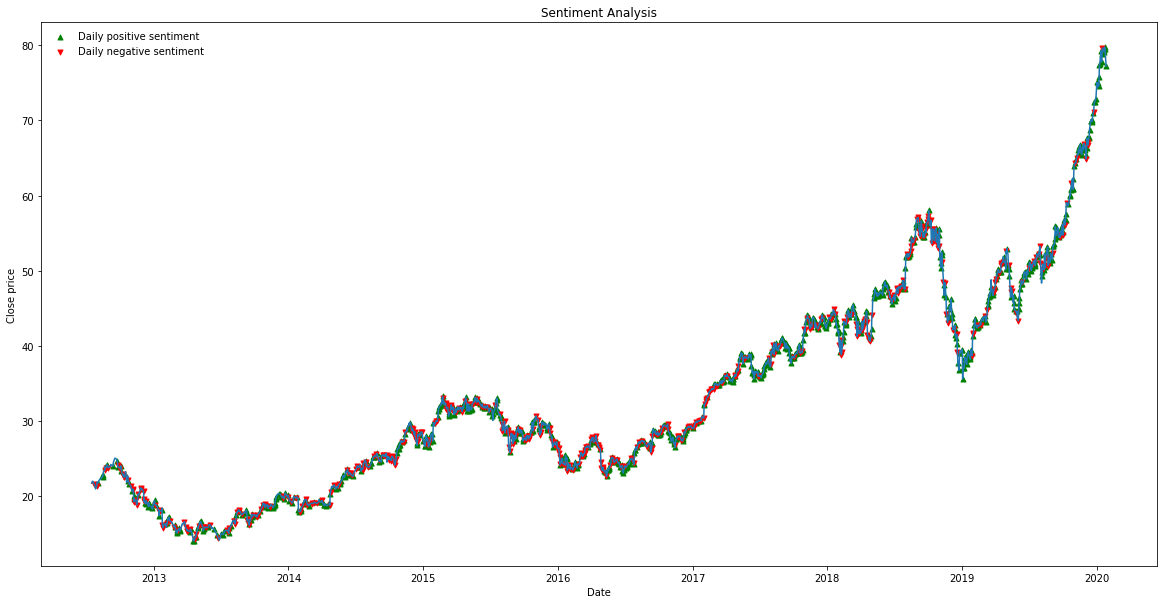

<ipython-input-11-c5f4991aabff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 0.9207687235256983
lr confidence:  0.9910923100735325


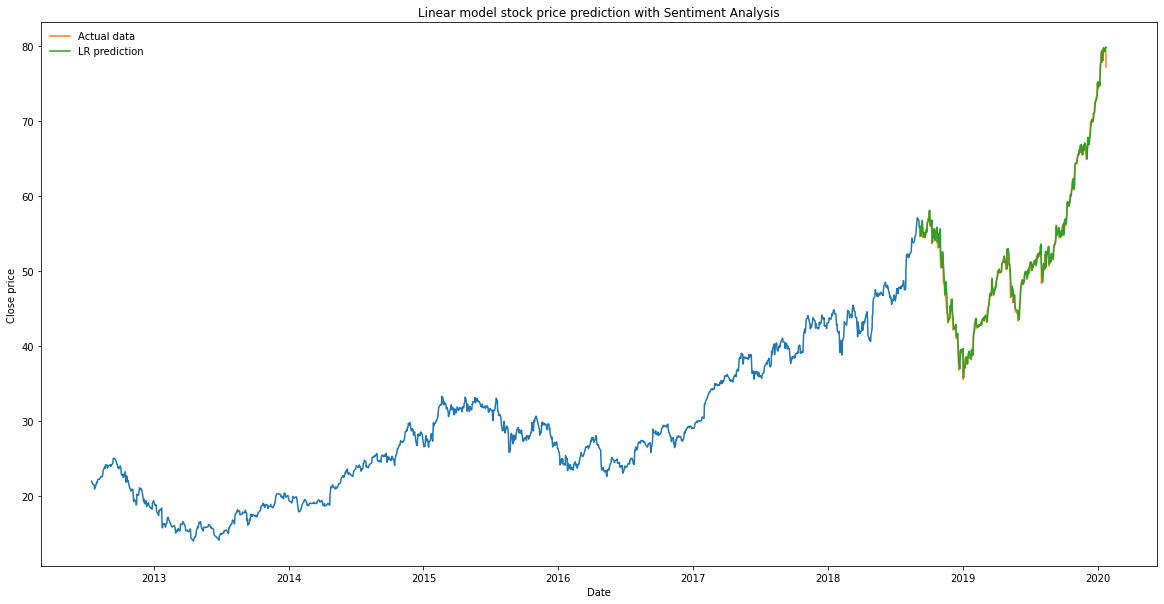

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-11-c5f4991aabff>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


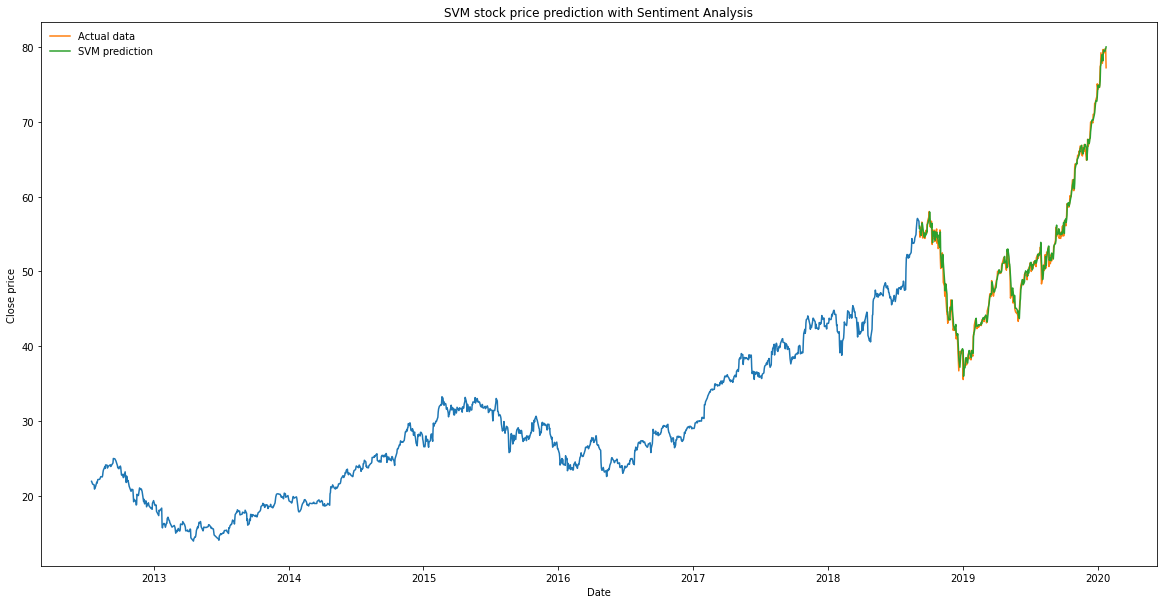

Support Vector Machine model Root mean square error 0.9272202692338429
svm confidence:  0.9909670458265831


In [11]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error , r2_score

def myfunc(merged_title, ticker) : 
    selected_data = merged_title[merged_title['ticker']==ticker]
    selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')
    return selected_data

def getStockData(selected_data):
    start = selected_data.head(1).release_date.values[0].astype(str)[:10]
    ticker = selected_data.head(1).ticker.values[0]
    end = selected_data.tail(1).release_date.values[0].astype(str)[:10]
    data_df = yf.download(ticker, start=start, end=end)
    merged = pd.merge(data_df,selected_data, left_index=True ,right_on='release_date', how='inner')
    plt.plot(merged['release_date'], merged['Close'])
    plt.scatter(merged.loc[merged['polarity'] > 0, 'release_date'].values,merged.loc[merged['polarity'] > 0, 'Close'].values, label='Daily positive sentiment', color='green',s=25,marker="^")
    plt.scatter(merged.loc[merged['polarity'] < 0, 'release_date'].values,merged.loc[merged['polarity'] < 0, 'Close'].values, label='Daily negative sentiment', color='red',s=25,marker="v")
    plt.legend(loc='upper left', frameon=False)
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.title("Sentiment Analysis")
    plt.show()
    return merged

def predict(merged):
    merged['date'] = merged['release_date']
    df_aapl = merged[['date', 'Open', 'High', 'Low','Close','Adj Close', 'Volume', 'polarity','subjectivity','positivity','negativity']]
    df_aapl = df_aapl.set_index('date')
    df_aapl

    df_aapl['Prediction'] = df_aapl[['Close']].shift(-1)
    X = df_aapl.drop(['Prediction'], 1)
    X = X[:-1]
    Y = df_aapl.head(-1)[['Prediction']]
    x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2, shuffle = False)
    
    lr_model=LinearRegression()
    lr_model.fit(x_train,y_train)
    
    y_test['lr_prediction'] =lr_model.predict(x_test)
    
    lr_rmse=math.sqrt(mean_squared_error(y_test['Prediction'],y_test['lr_prediction']))
    print('Linear Model Root mean square error',lr_rmse)
    
    lr_confidence = lr_model.score(x_test, y_test['Prediction'])
    print("lr confidence: ", lr_confidence)
    
    plt.plot(y_train["Prediction"])
    plt.plot(y_test['Prediction'], label = 'Actual data')
    plt.plot(y_test['lr_prediction'], label = 'LR prediction')
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.title("Linear model stock price prediction with Sentiment Analysis")
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

    x_train = scaling.transform(x_train)
    x_test = scaling.transform(x_test)

    svr_rbf = SVR(kernel='linear')
    svm_model=svr_rbf.fit(x_train,y_train)
    
    y_test['svm_prediction'] = svm_model.predict(x_test)
    
    ret_object = {'x': y_train,'y': y_test}
    
    plt.plot(y_train["Prediction"])
    plt.plot(y_test['Prediction'], label = 'Actual data')
    plt.plot(y_test['svm_prediction'], label = 'SVM prediction')
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.title("SVM stock price prediction with Sentiment Analysis")
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
    svm_rmse=math.sqrt(mean_squared_error(y_test['Prediction'],y_test['svm_prediction']))
    print('Support Vector Machine model Root mean square error',svm_rmse)
    
    svm_confidence = svr_rbf.score(x_test, y_test['Prediction'])
    print("svm confidence: ", svm_confidence)
    
    return ret_object
    
title_data = myfunc(merged_title, 'AAPL')
merged = getStockData(title_data)

appl_pred = predict(merged)


<ipython-input-11-c5f4991aabff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


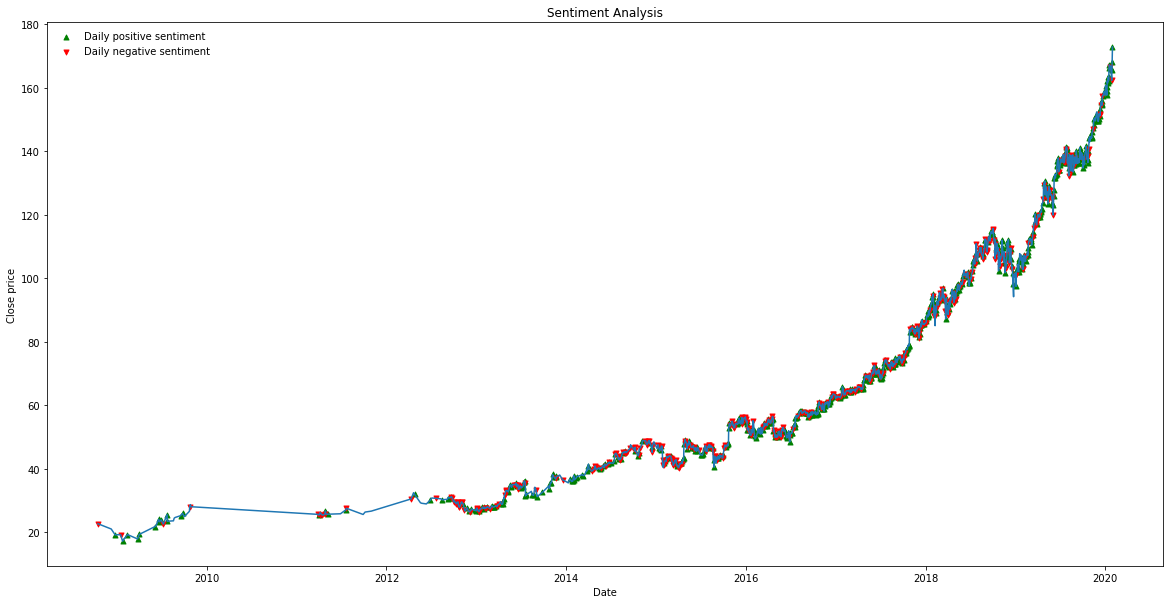

<ipython-input-11-c5f4991aabff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 1.7424626440341962
lr confidence:  0.9903678373388904


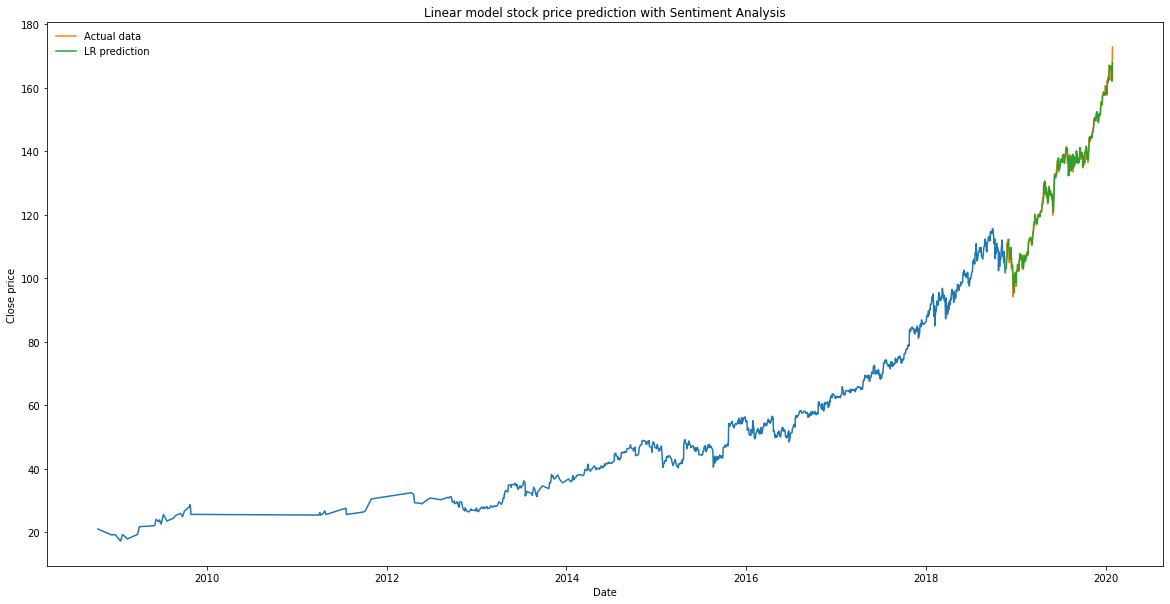

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-11-c5f4991aabff>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


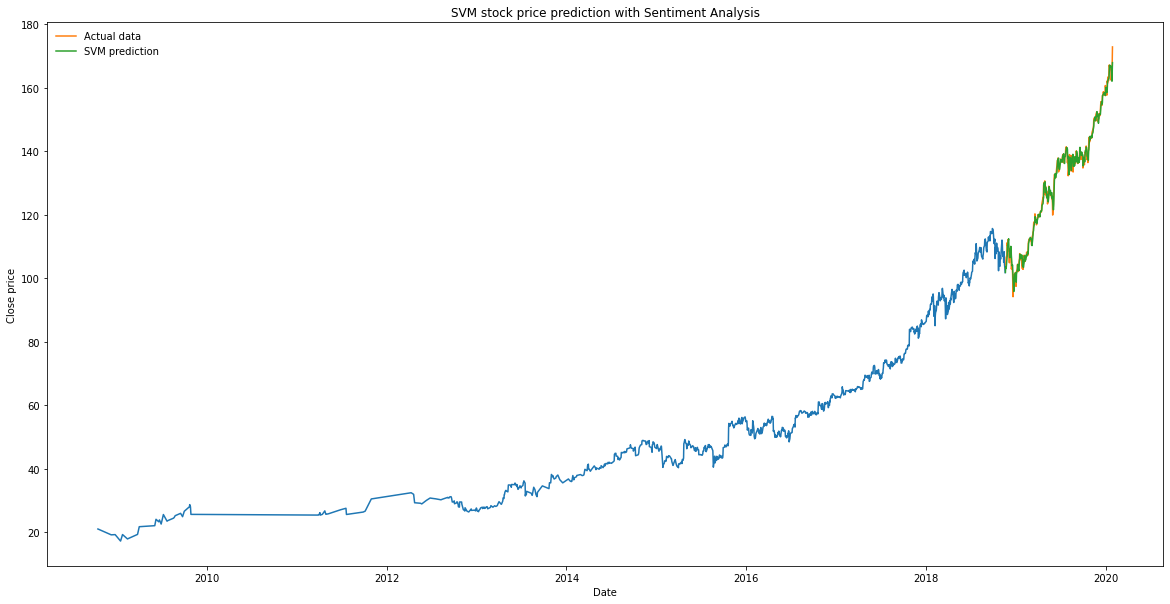

Support Vector Machine model Root mean square error 1.7690292089806472
svm confidence:  0.9900718835361794


In [12]:
title_data = myfunc(merged_title, 'MSFT')
merged = getStockData(title_data)
msft_pred = predict(merged)

<ipython-input-11-c5f4991aabff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


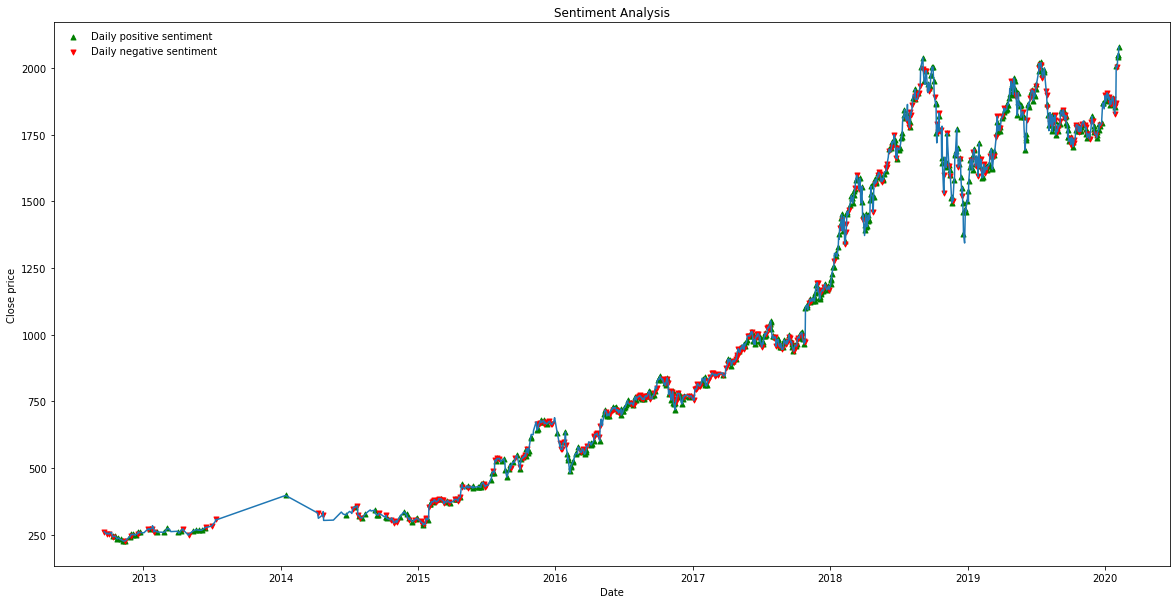

<ipython-input-11-c5f4991aabff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 25.20679241995068
lr confidence:  0.9293651407482723


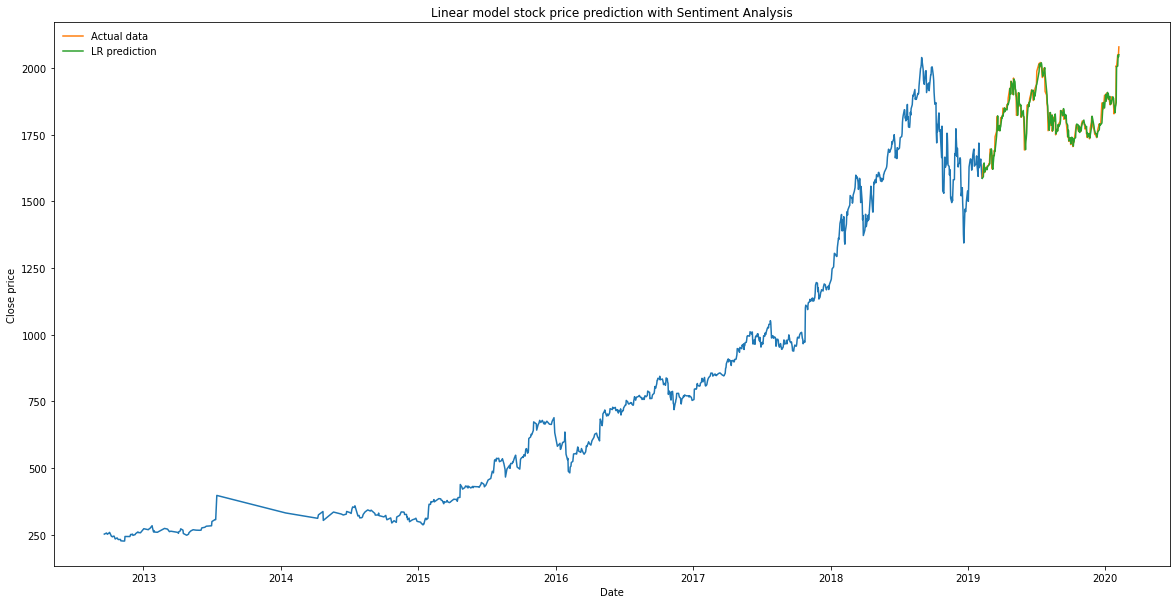

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-11-c5f4991aabff>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


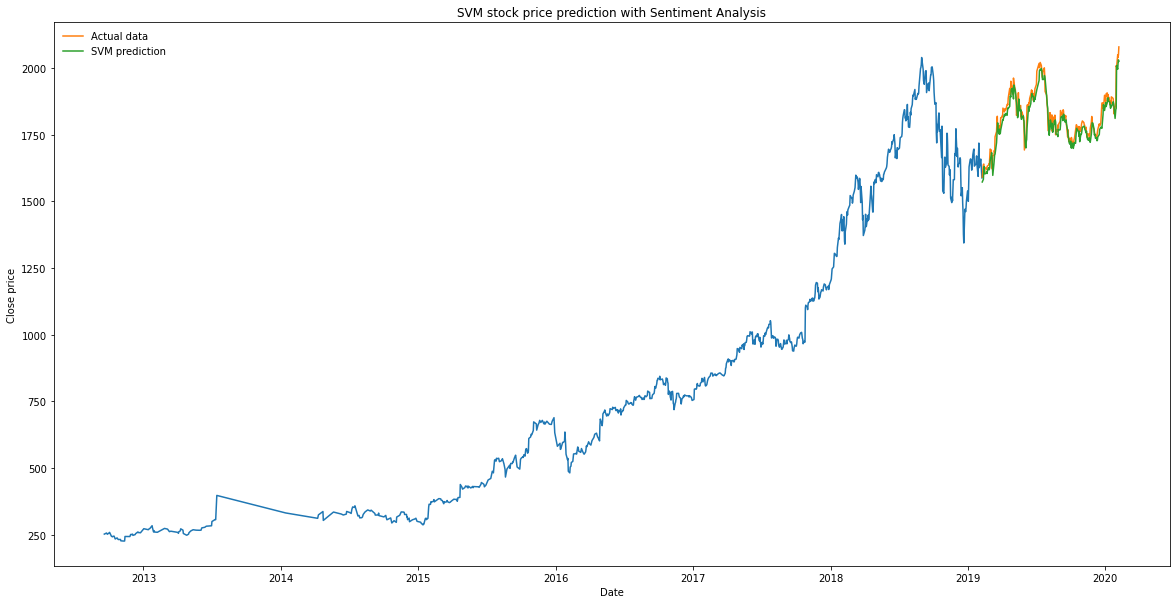

Support Vector Machine model Root mean square error 31.950539927082545
svm confidence:  0.8865145151433589


In [13]:
title_data = myfunc(merged_title, 'AMZN')
merged = getStockData(title_data)
amzn_pred = predict(merged)

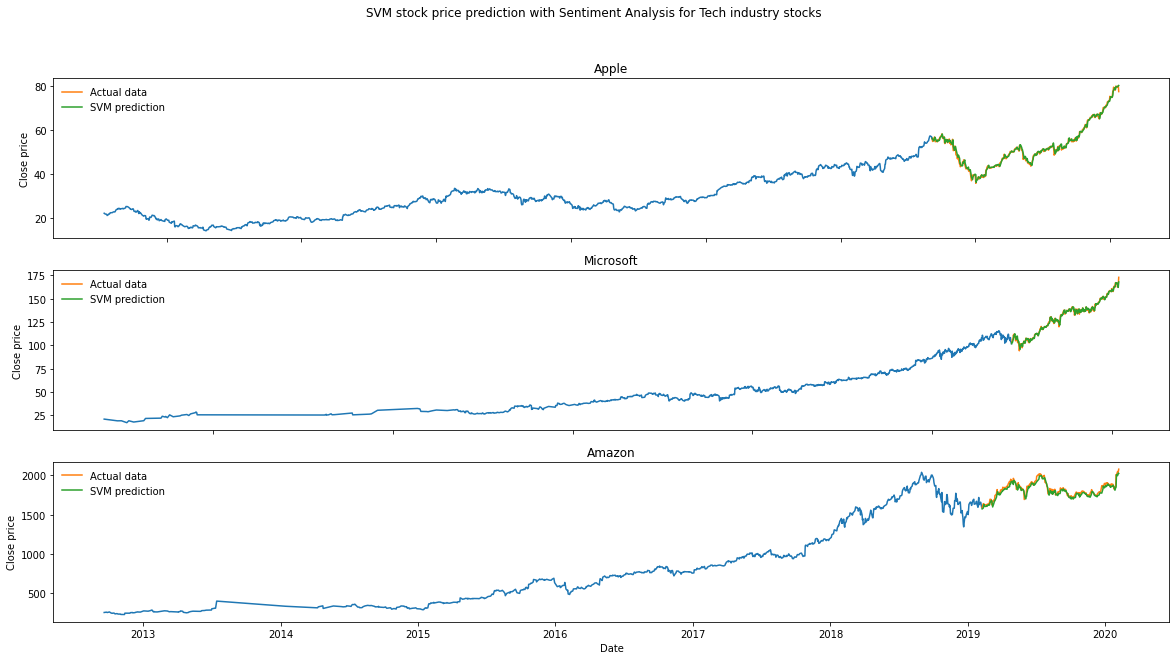

In [27]:
fig, axs = plt.subplots(3)
fig.suptitle('SVM stock price prediction with Sentiment Analysis for Tech industry stocks')

axs[0].plot(appl_pred['x']['Prediction'])
axs[0].plot(appl_pred['y']['Prediction'], label = 'Actual data')
axs[0].plot(appl_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[0].set_title("Apple")
axs[0].legend(loc='upper left', frameon=False)

axs[1].plot(msft_pred['x']['Prediction'])
axs[1].plot(msft_pred['y']['Prediction'], label = 'Actual data')
axs[1].plot(msft_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[1].set_title("Microsoft")
axs[1].legend(loc='upper left', frameon=False)

axs[2].plot(amzn_pred['x']['Prediction'])
axs[2].plot(amzn_pred['y']['Prediction'], label = 'Actual data')
axs[2].plot(amzn_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[2].set_title("Amazon")
axs[2].legend(loc='upper left', frameon=False)


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Close price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[*********************100%***********************]  1 of 1 completed


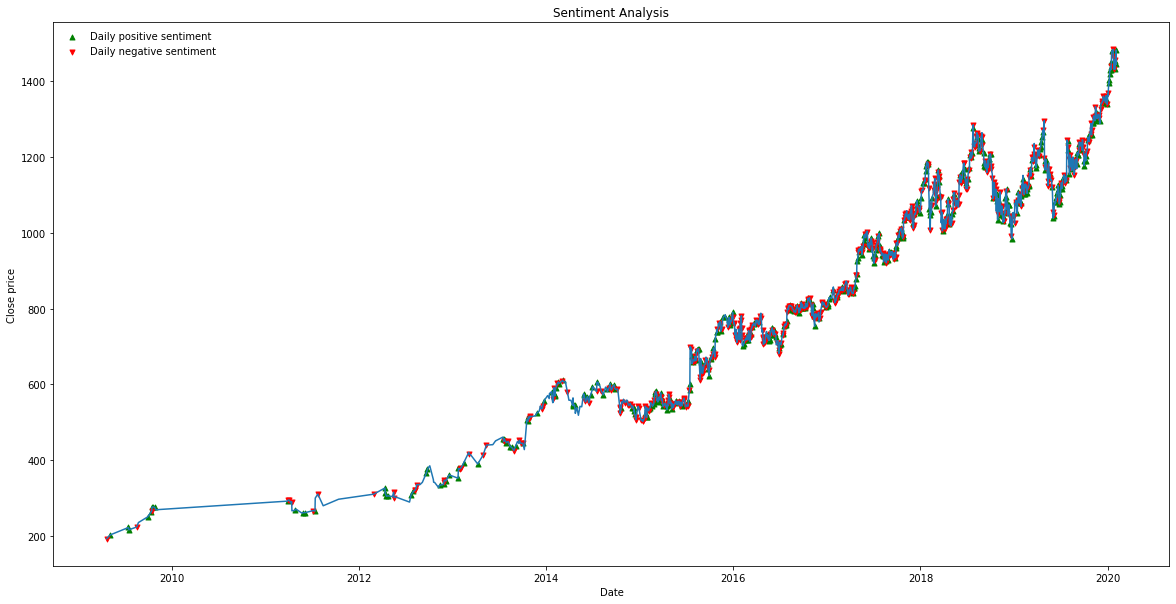

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Model Root mean square error 18.35978957998069
lr confidence:  0.9708486996171133


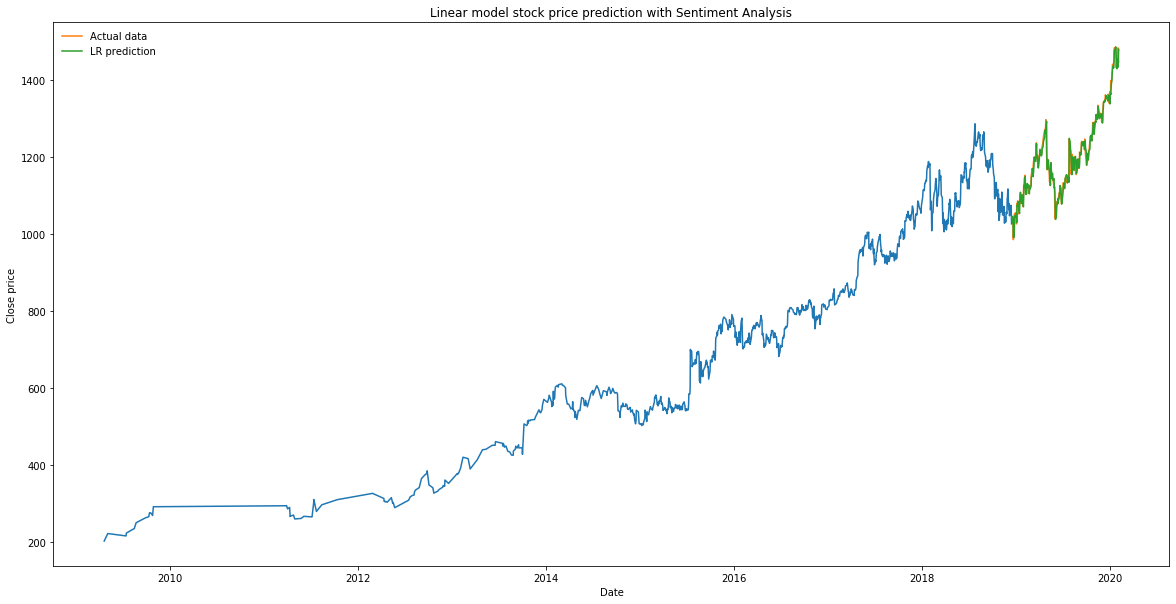

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


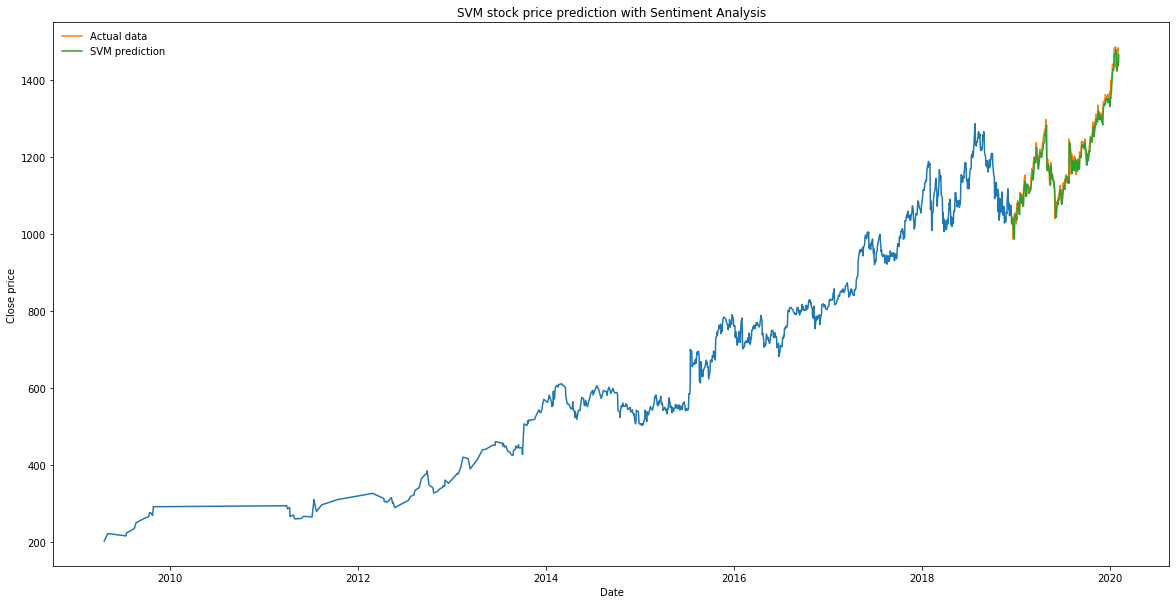

Support Vector Machine model Root mean square error 20.09630916387983
svm confidence:  0.9650734941043345


In [42]:
title_data = myfunc(merged_title, 'GOOGL')
merged = getStockData(title_data)
predict(merged)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[*********************100%***********************]  1 of 1 completed


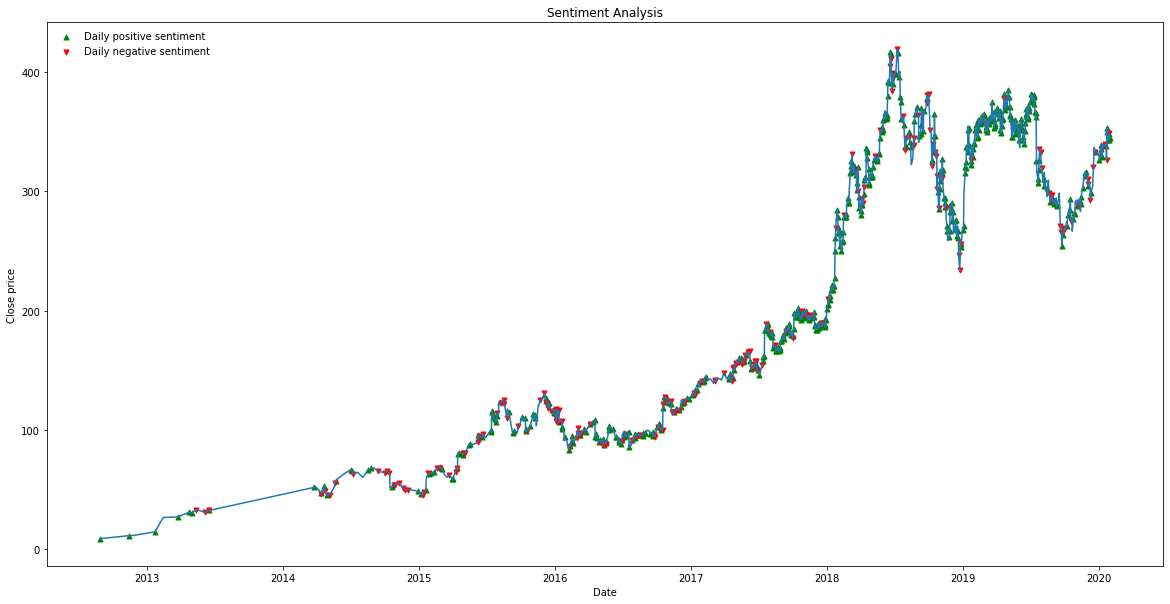

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Model Root mean square error 7.258617389787893
lr confidence:  0.9541239482590698


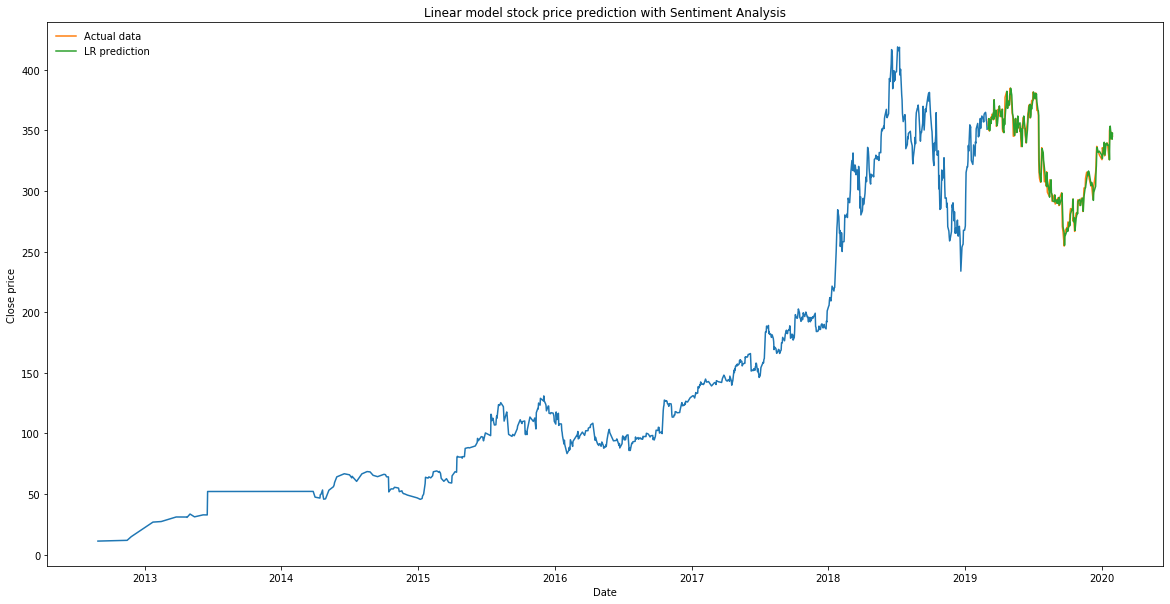

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


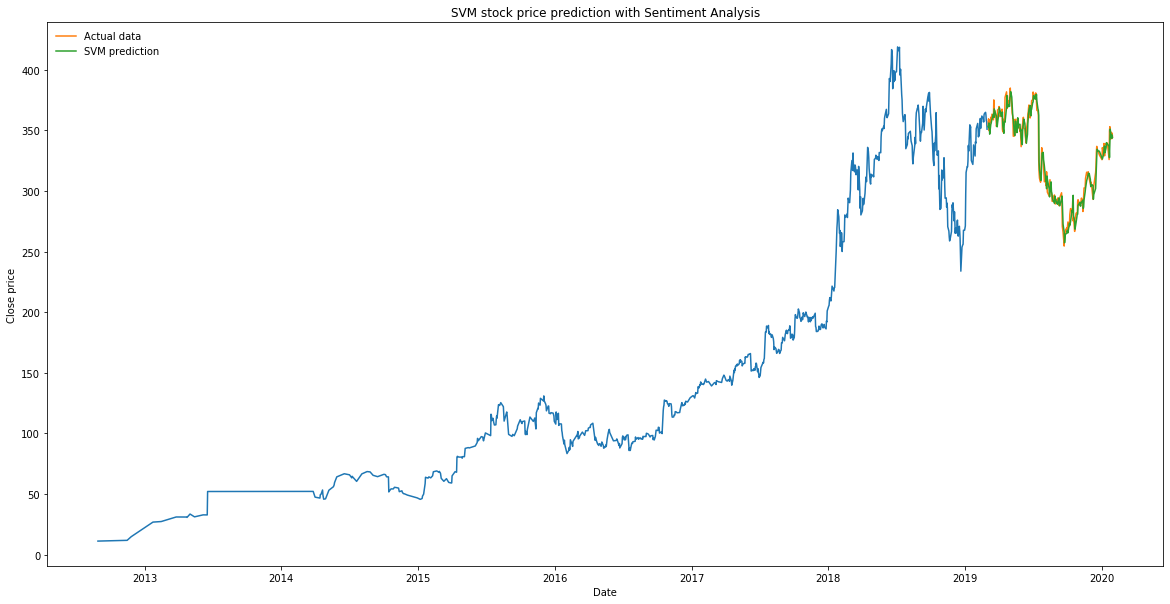

Support Vector Machine model Root mean square error 7.563208619210606
svm confidence:  0.9501929999870247


In [43]:
title_data = myfunc(merged_title, 'NFLX')
merged = getStockData(title_data)
predict(merged)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[*********************100%***********************]  1 of 1 completed


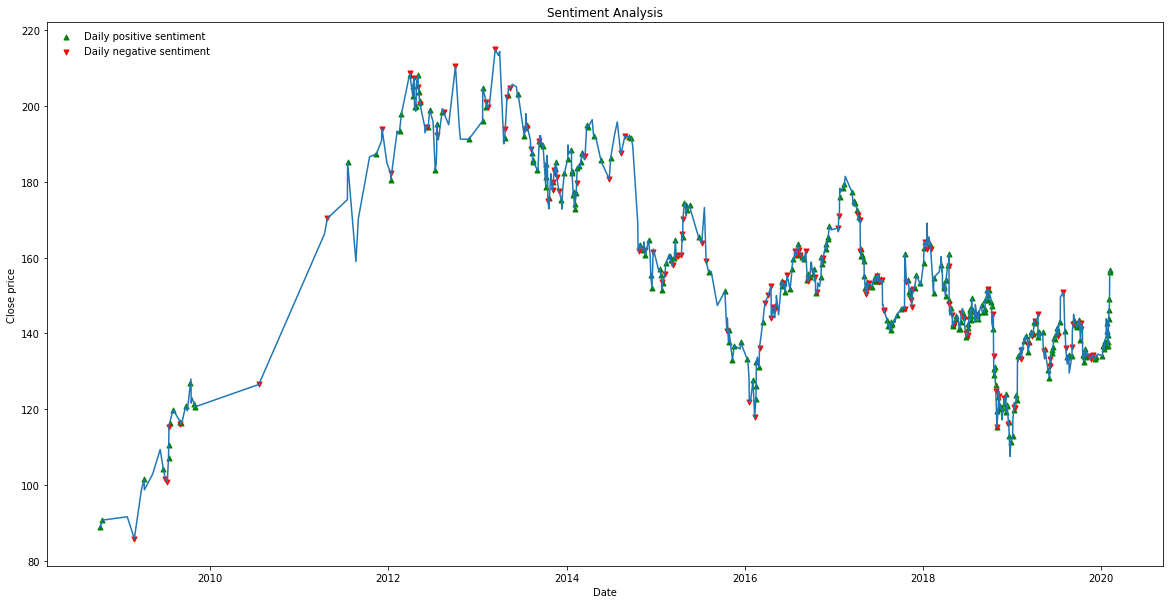

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Model Root mean square error 2.6723465663969663
lr confidence:  0.8998495916801363


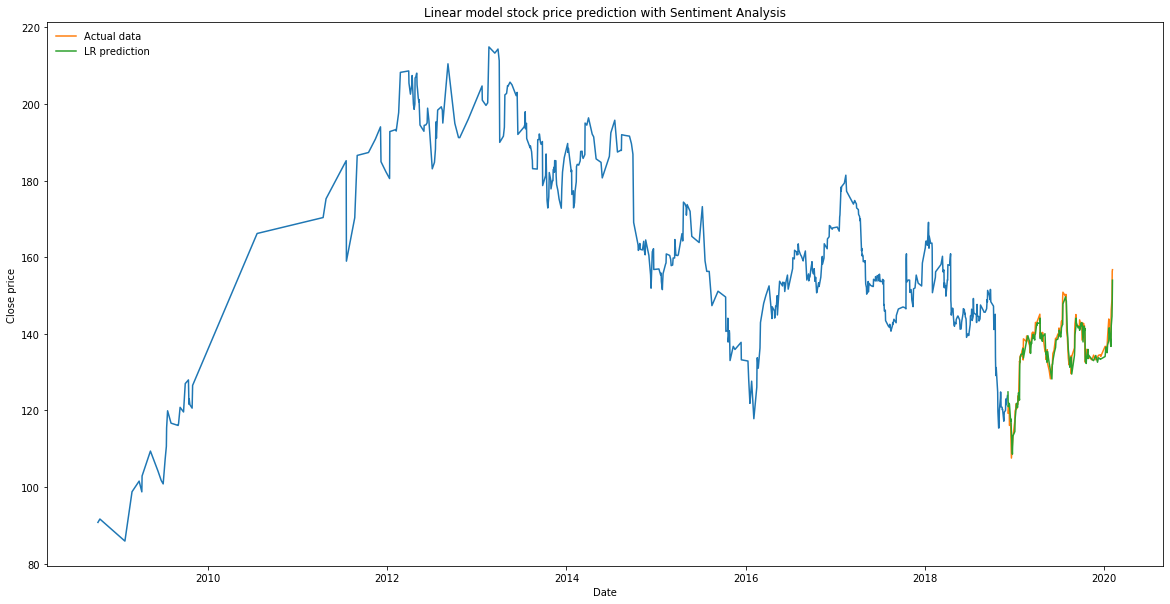

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


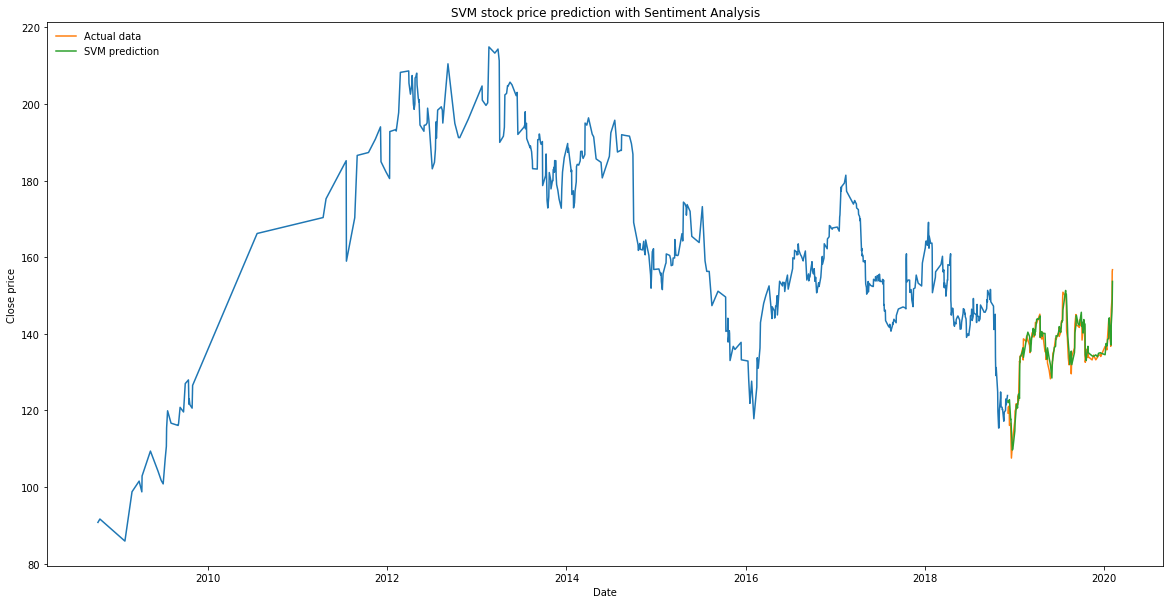

Support Vector Machine model Root mean square error 2.760079708819926
svm confidence:  0.8931657725085973


In [44]:
title_data = myfunc(merged_title, 'IBM')
merged = getStockData(title_data)
predict(merged)

<ipython-input-11-c5f4991aabff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


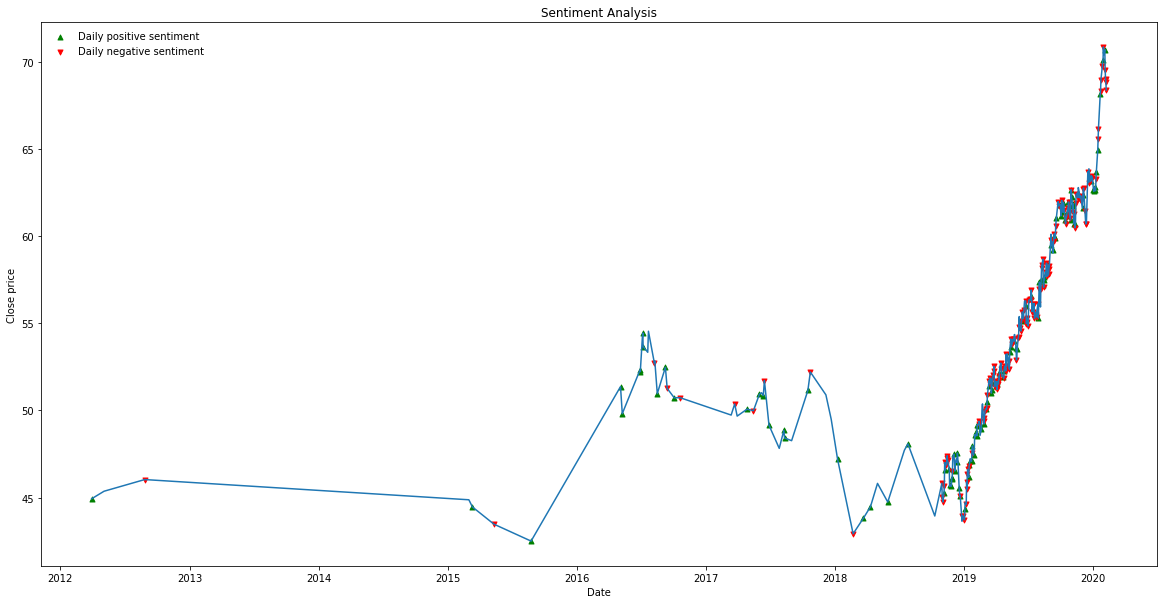

<ipython-input-11-c5f4991aabff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 0.7789804809188712
lr confidence:  0.9333549263144633


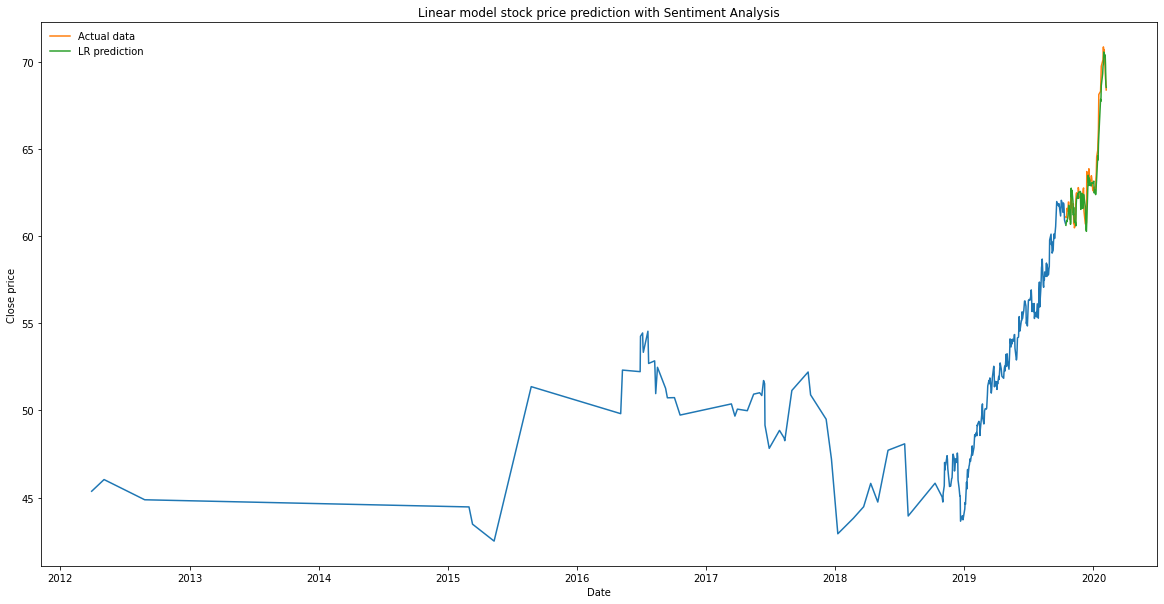

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-11-c5f4991aabff>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


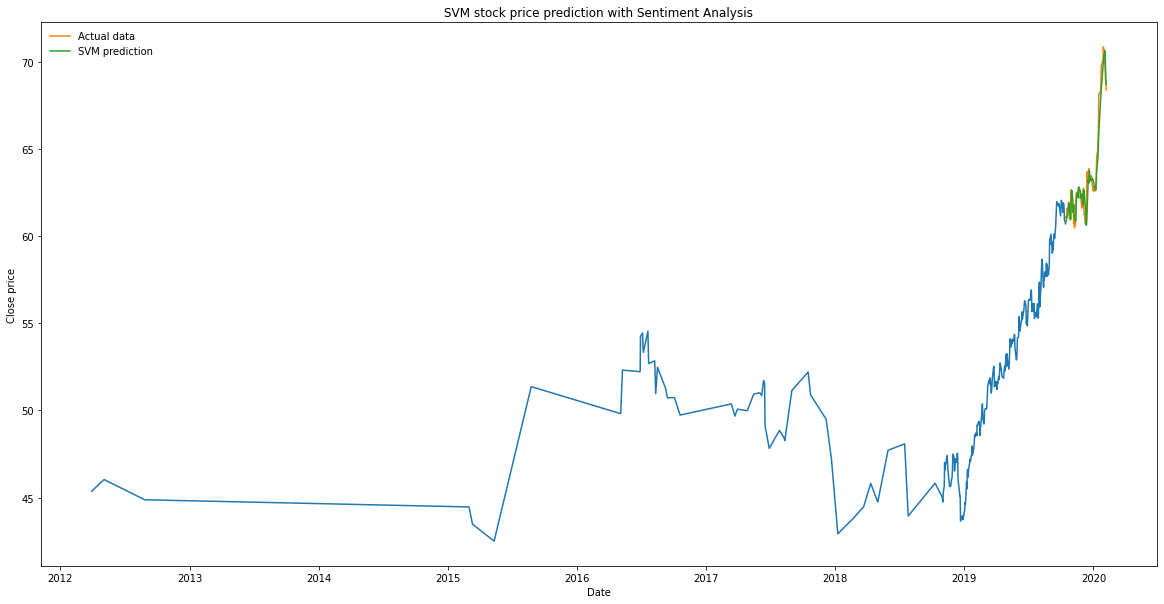

Support Vector Machine model Root mean square error 0.7278531724217217
svm confidence:  0.9418161493495101


In [28]:
title_data = myfunc(merged_title, 'SO')
merged = getStockData(title_data)
so_pred = predict(merged)

<ipython-input-11-c5f4991aabff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


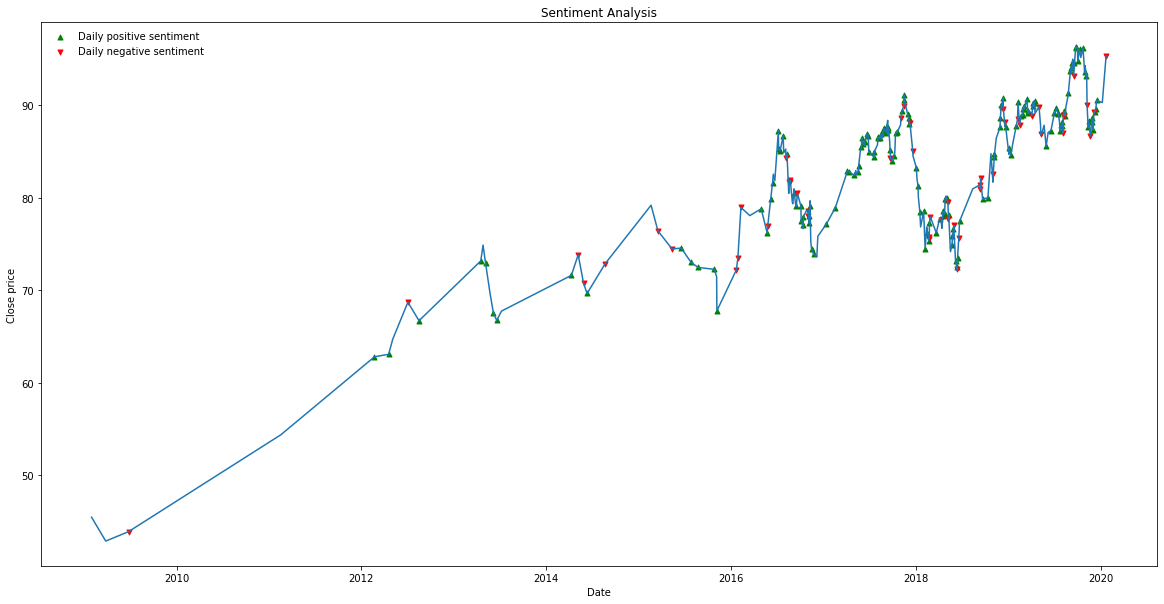

<ipython-input-11-c5f4991aabff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 1.3988592056551086
lr confidence:  0.8140481090681412


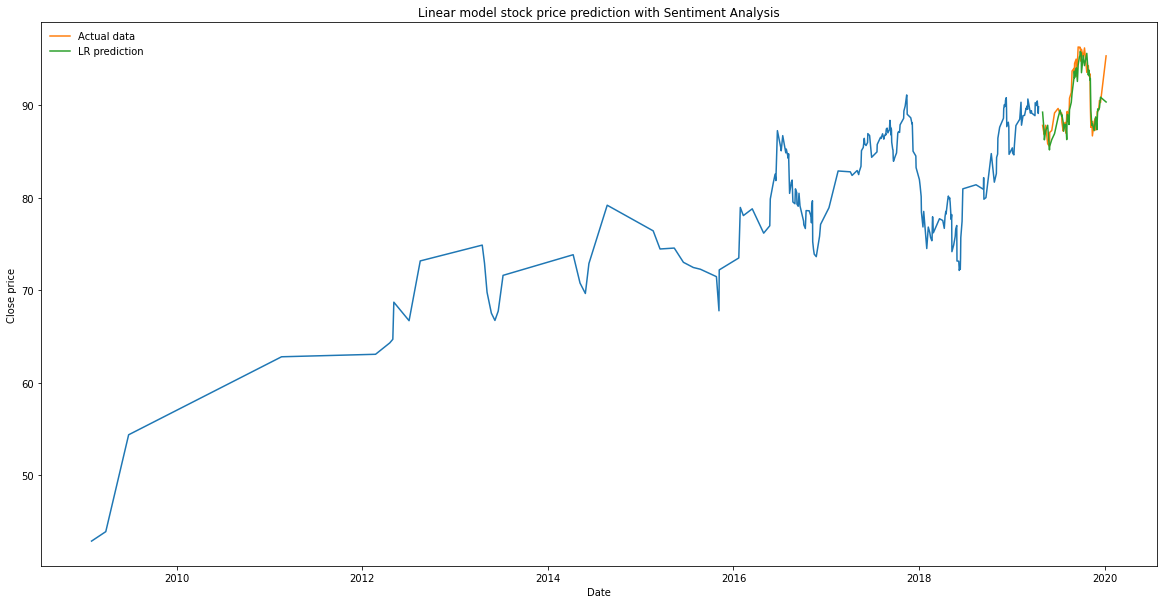

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-11-c5f4991aabff>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


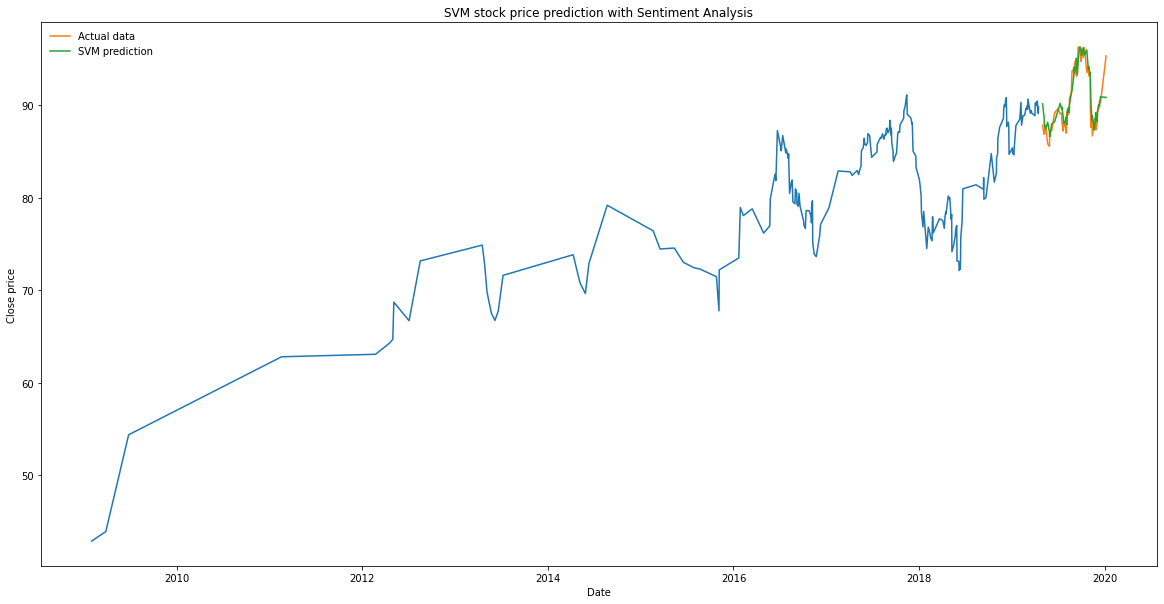

Support Vector Machine model Root mean square error 1.3630909753457758
svm confidence:  0.8234359534644049


In [29]:
title_data = myfunc(merged_title, 'DUK')
merged = getStockData(title_data)
duk_pred = predict(merged)

<ipython-input-11-c5f4991aabff>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


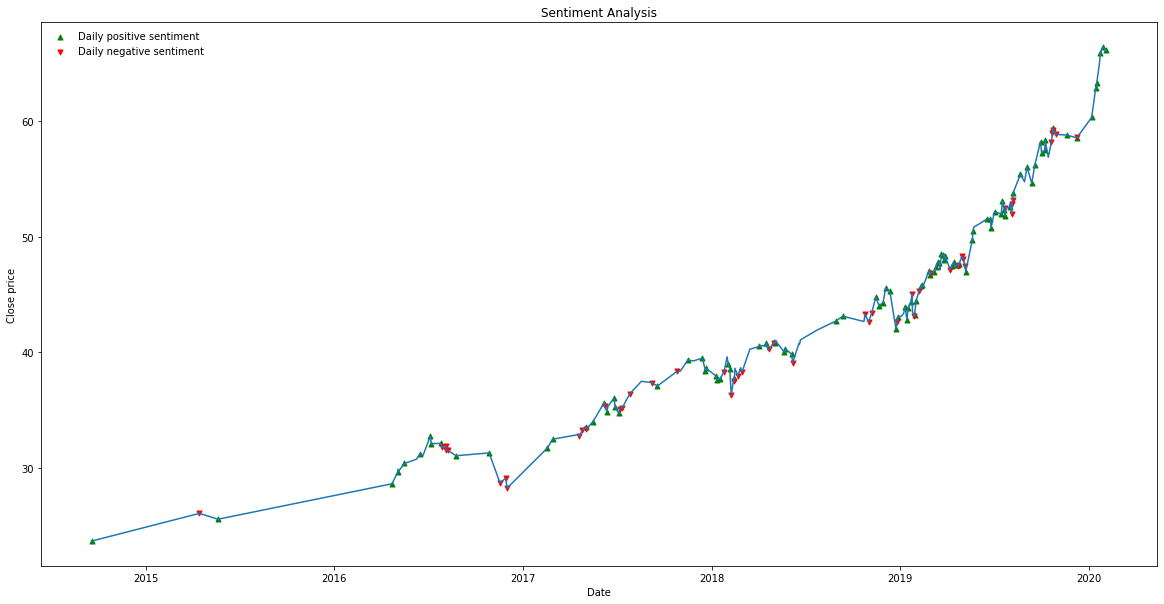

<ipython-input-11-c5f4991aabff>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 1.4967557615458016
lr confidence:  0.8822443745985843


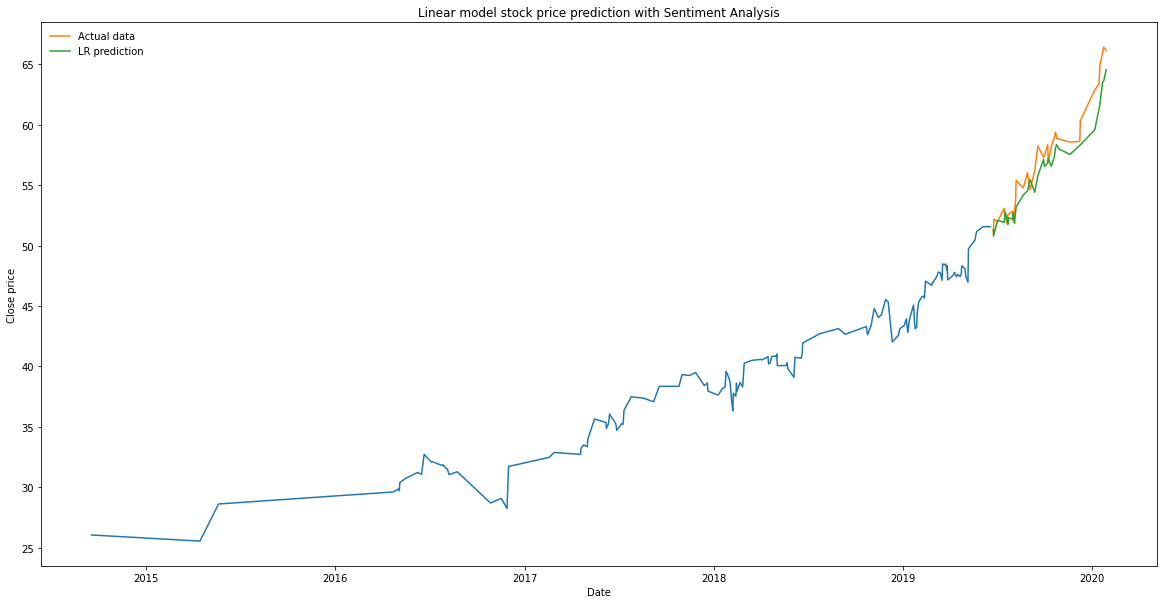

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-11-c5f4991aabff>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


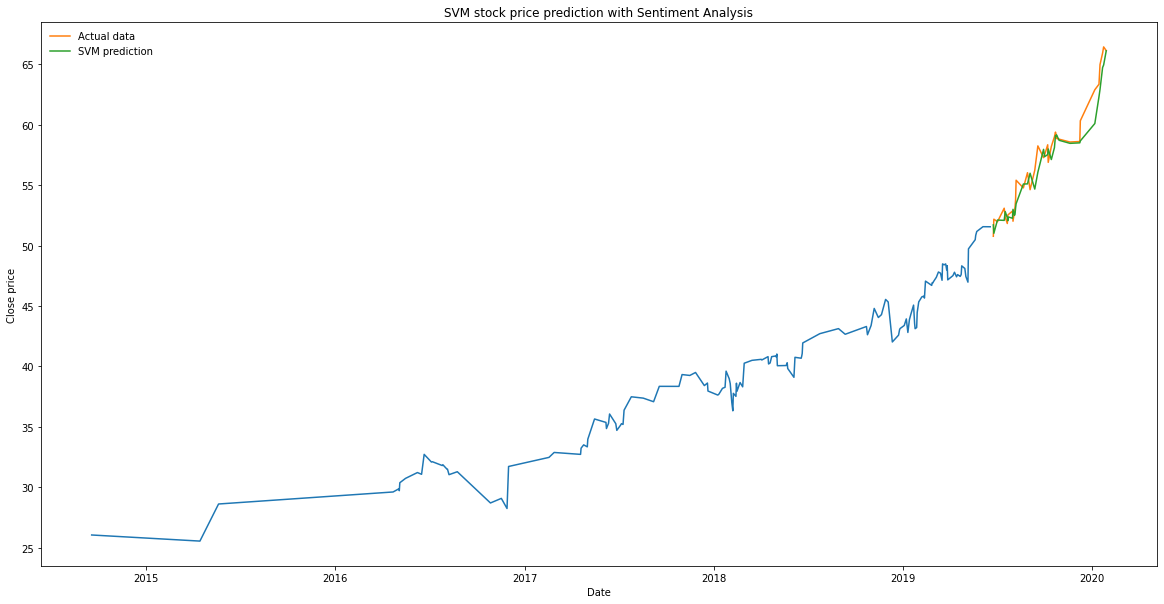

Support Vector Machine model Root mean square error 1.0781024156923702
svm confidence:  0.938905822196789


In [30]:
title_data = myfunc(merged_title, 'NEE')
merged = getStockData(title_data)
nee_pred = predict(merged)

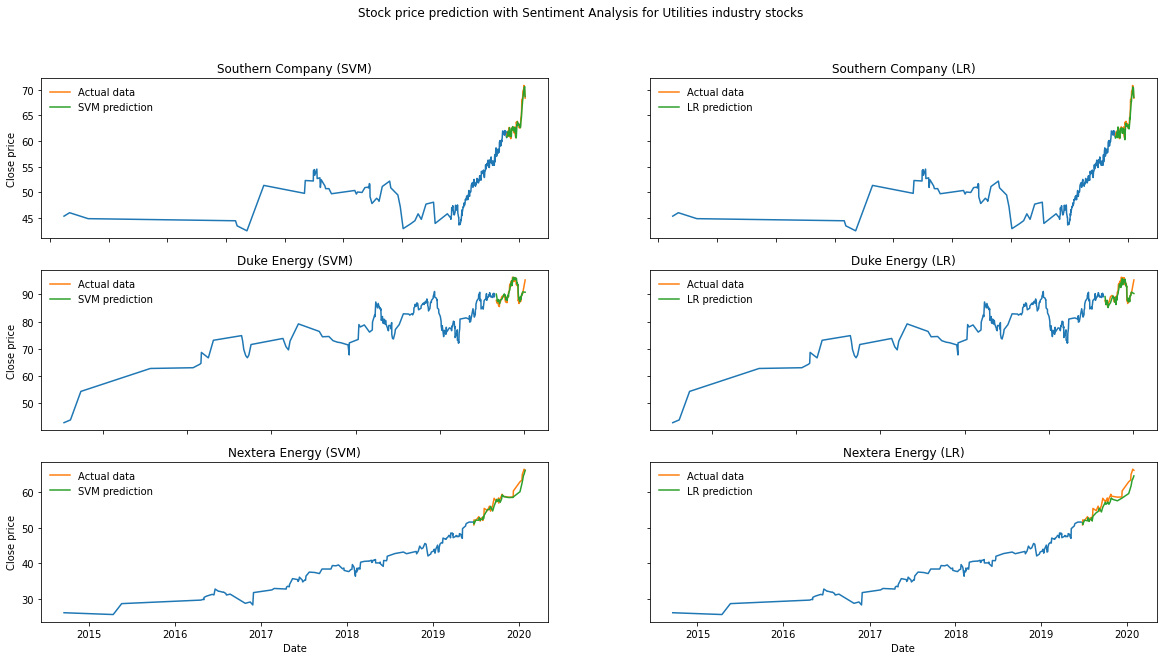

In [44]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Stock price prediction with Sentiment Analysis for Utilities industry stocks')

axs[0,0].plot(so_pred['x']['Prediction'])
axs[0,0].plot(so_pred['y']['Prediction'], label = 'Actual data')
axs[0,0].plot(so_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[0,0].set_title("Southern Company (SVM)")
axs[0,0].legend(loc='upper left', frameon=False)

axs[1,0].plot(duk_pred['x']['Prediction'])
axs[1,0].plot(duk_pred['y']['Prediction'], label = 'Actual data')
axs[1,0].plot(duk_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[1,0].set_title("Duke Energy (SVM)")
axs[1,0].legend(loc='upper left', frameon=False)

axs[2,0].plot(nee_pred['x']['Prediction'])
axs[2,0].plot(nee_pred['y']['Prediction'], label = 'Actual data')
axs[2,0].plot(nee_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[2,0].set_title("Nextera Energy (SVM)")
axs[2,0].legend(loc='upper left', frameon=False)


axs[0,1].plot(so_pred['x']['Prediction'])
axs[0,1].plot(so_pred['y']['Prediction'], label = 'Actual data')
axs[0,1].plot(so_pred['y']['lr_prediction'], label = 'LR prediction')
axs[0,1].set_title("Southern Company (LR)")
axs[0,1].legend(loc='upper left', frameon=False)

axs[1,1].plot(duk_pred['x']['Prediction'])
axs[1,1].plot(duk_pred['y']['Prediction'], label = 'Actual data')
axs[1,1].plot(duk_pred['y']['lr_prediction'], label = 'LR prediction')
axs[1,1].set_title("Duke Energy (LR)")
axs[1,1].legend(loc='upper left', frameon=False)

axs[2,1].plot(nee_pred['x']['Prediction'])
axs[2,1].plot(nee_pred['y']['Prediction'], label = 'Actual data')
axs[2,1].plot(nee_pred['y']['lr_prediction'], label = 'LR prediction')
axs[2,1].set_title("Nextera Energy (LR)")
axs[2,1].legend(loc='upper left', frameon=False)


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Close price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



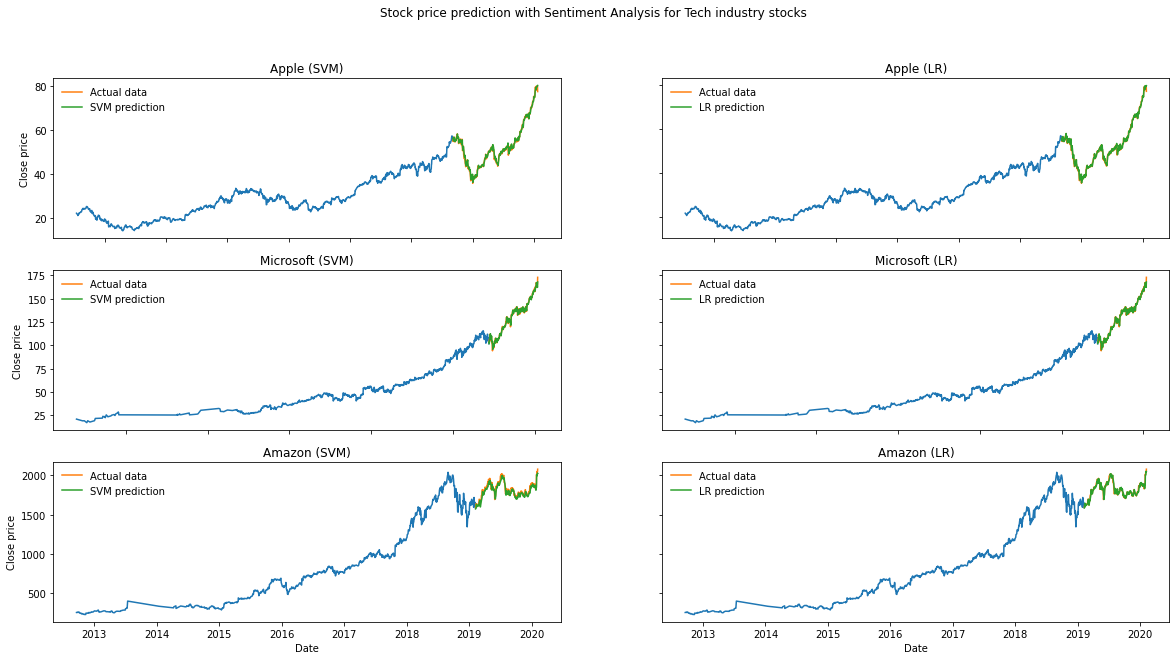

In [43]:
fig, axs = plt.subplots(3, 2)
fig.suptitle('Stock price prediction with Sentiment Analysis for Tech industry stocks')

axs[0,0].plot(appl_pred['x']['Prediction'])
axs[0,0].plot(appl_pred['y']['Prediction'], label = 'Actual data')
axs[0,0].plot(appl_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[0,0].set_title("Apple (SVM)")
axs[0,0].legend(loc='upper left', frameon=False)

axs[1,0].plot(msft_pred['x']['Prediction'])
axs[1,0].plot(msft_pred['y']['Prediction'], label = 'Actual data')
axs[1,0].plot(msft_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[1,0].set_title("Microsoft (SVM)")
axs[1,0].legend(loc='upper left', frameon=False)

axs[2,0].plot(amzn_pred['x']['Prediction'])
axs[2,0].plot(amzn_pred['y']['Prediction'], label = 'Actual data')
axs[2,0].plot(amzn_pred['y']['svm_prediction'], label = 'SVM prediction')
axs[2,0].set_title("Amazon (SVM)")
axs[2,0].legend(loc='upper left', frameon=False)


axs[0,1].plot(appl_pred['x']['Prediction'])
axs[0,1].plot(appl_pred['y']['Prediction'], label = 'Actual data')
axs[0,1].plot(appl_pred['y']['lr_prediction'], label = 'LR prediction')
axs[0,1].set_title("Apple (LR)")
axs[0,1].legend(loc='upper left', frameon=False)

axs[1,1].plot(msft_pred['x']['Prediction'])
axs[1,1].plot(msft_pred['y']['Prediction'], label = 'Actual data')
axs[1,1].plot(msft_pred['y']['lr_prediction'], label = 'LR prediction')
axs[1,1].set_title("Microsoft (LR)")
axs[1,1].legend(loc='upper left', frameon=False)

axs[2,1].plot(amzn_pred['x']['Prediction'])
axs[2,1].plot(amzn_pred['y']['Prediction'], label = 'Actual data')
axs[2,1].plot(amzn_pred['y']['lr_prediction'], label = 'LR prediction')
axs[2,1].set_title("Amazon (LR)")
axs[2,1].legend(loc='upper left', frameon=False)


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Close price')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[*********************100%***********************]  1 of 1 completed


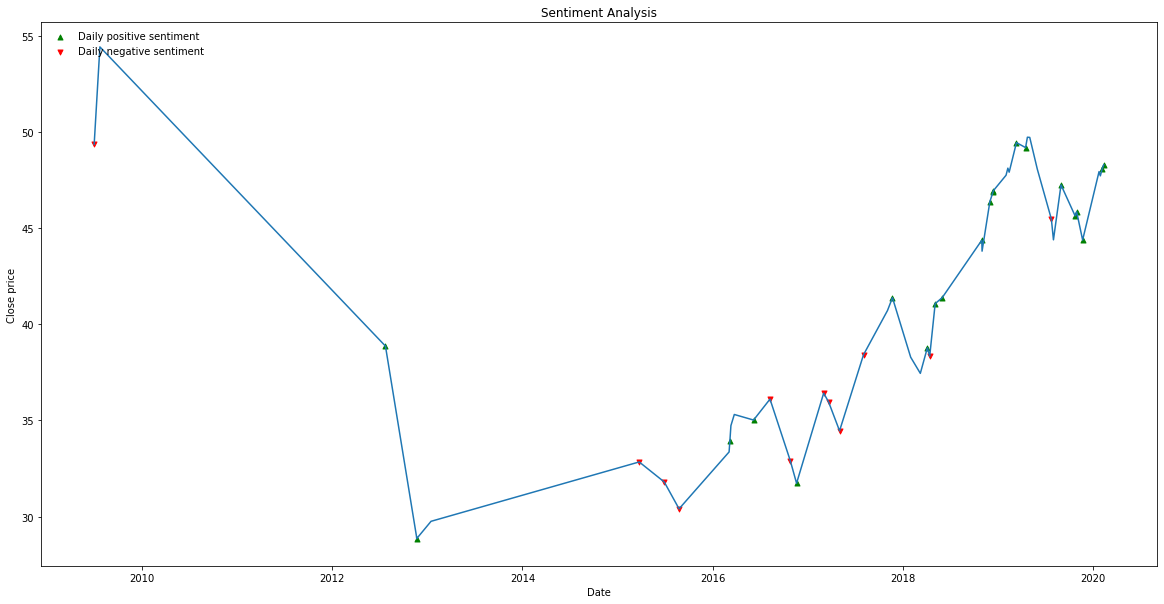

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Model Root mean square error 2.0191558062532367
lr confidence:  -0.9276155859383743


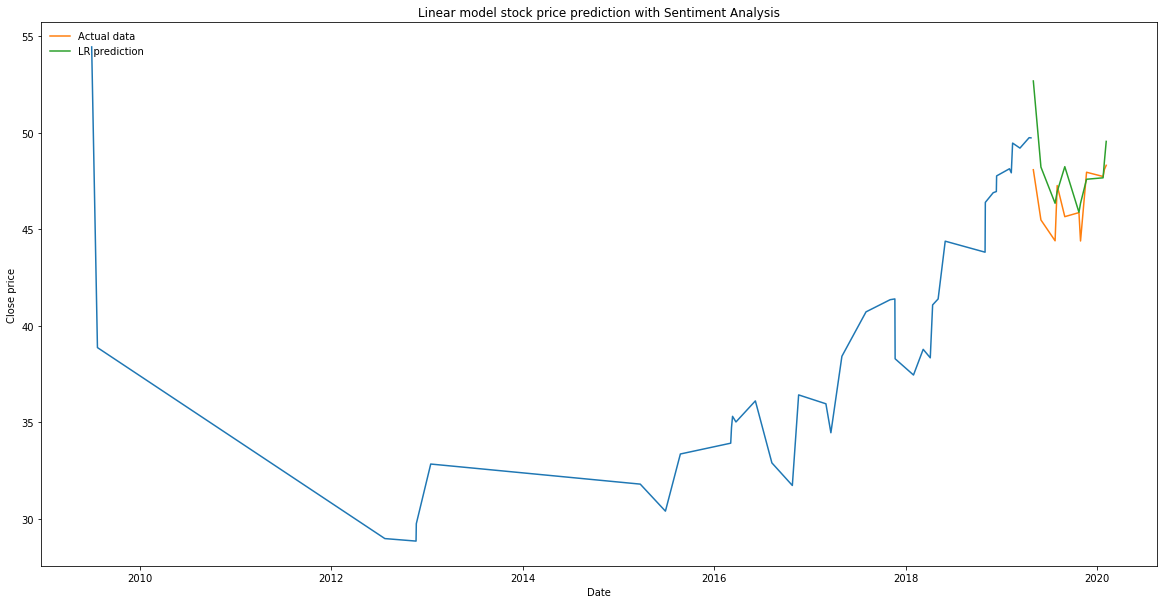

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


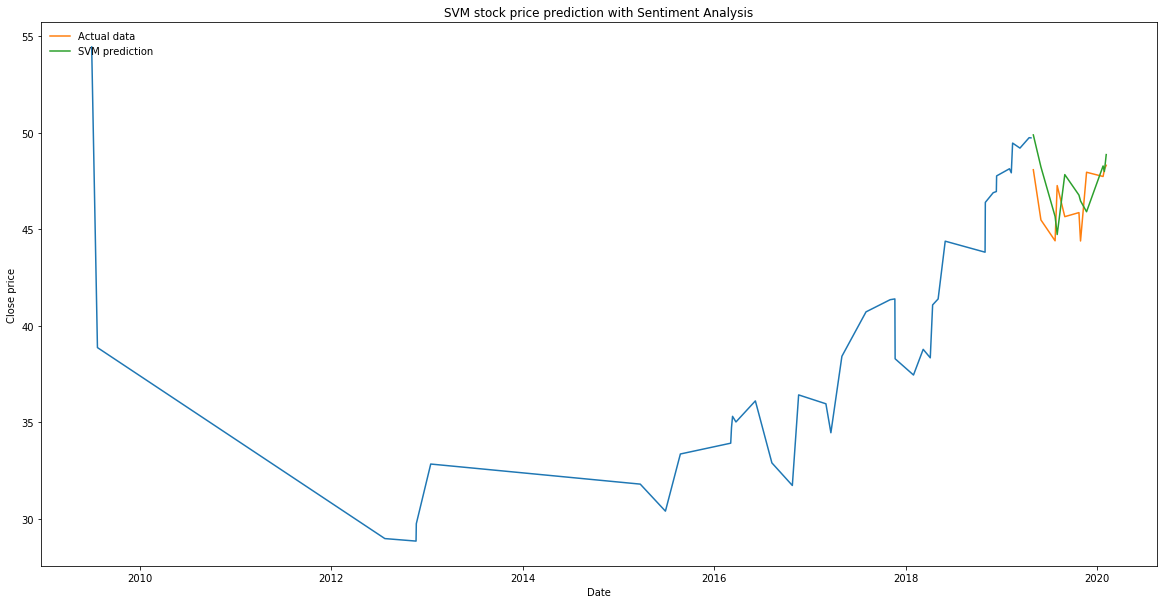

Support Vector Machine model Root mean square error 1.7439408765458473
svm confidence:  -0.43795163669071635


In [48]:
title_data = myfunc(merged_title, 'EXC')
merged = getStockData(title_data)
predict(merged)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


[*********************100%***********************]  1 of 1 completed


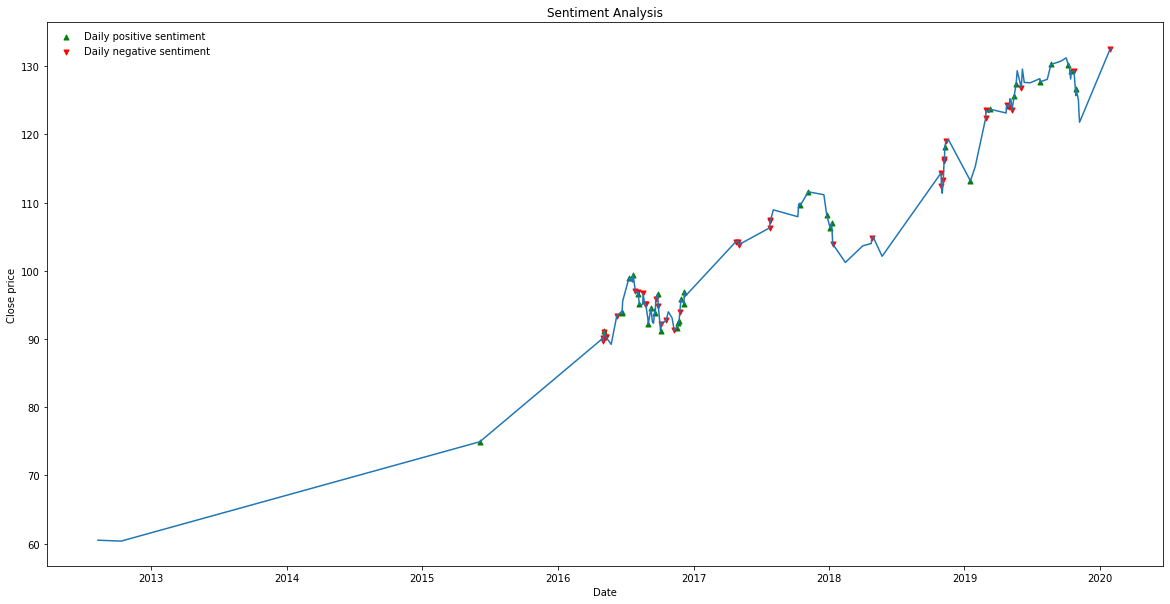

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Model Root mean square error 2.445644481741127
lr confidence:  0.11744679818509385


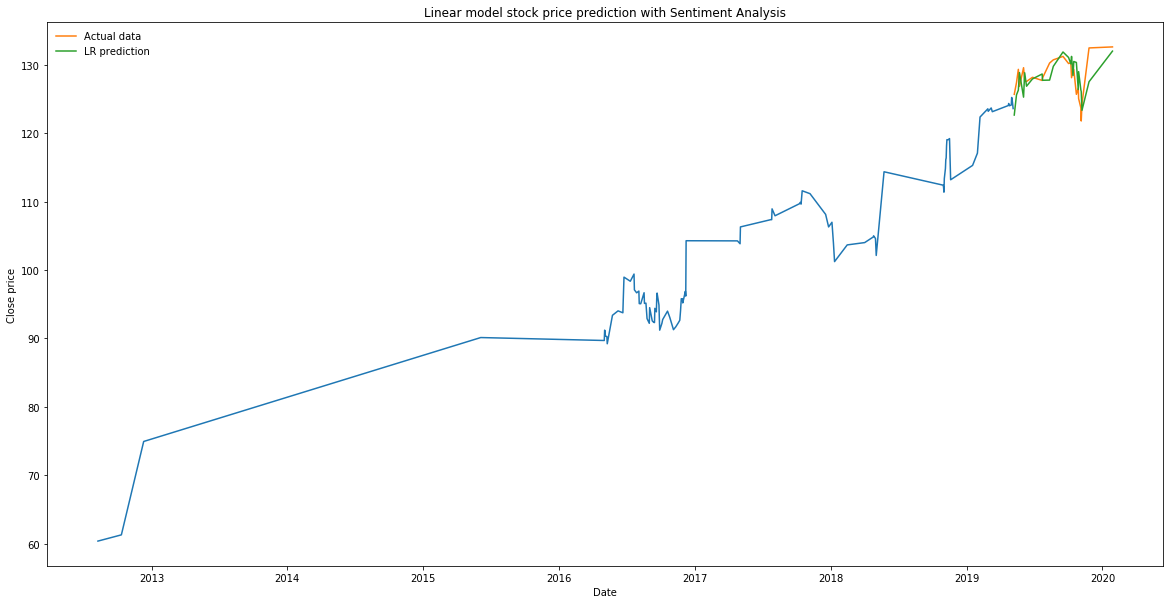

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


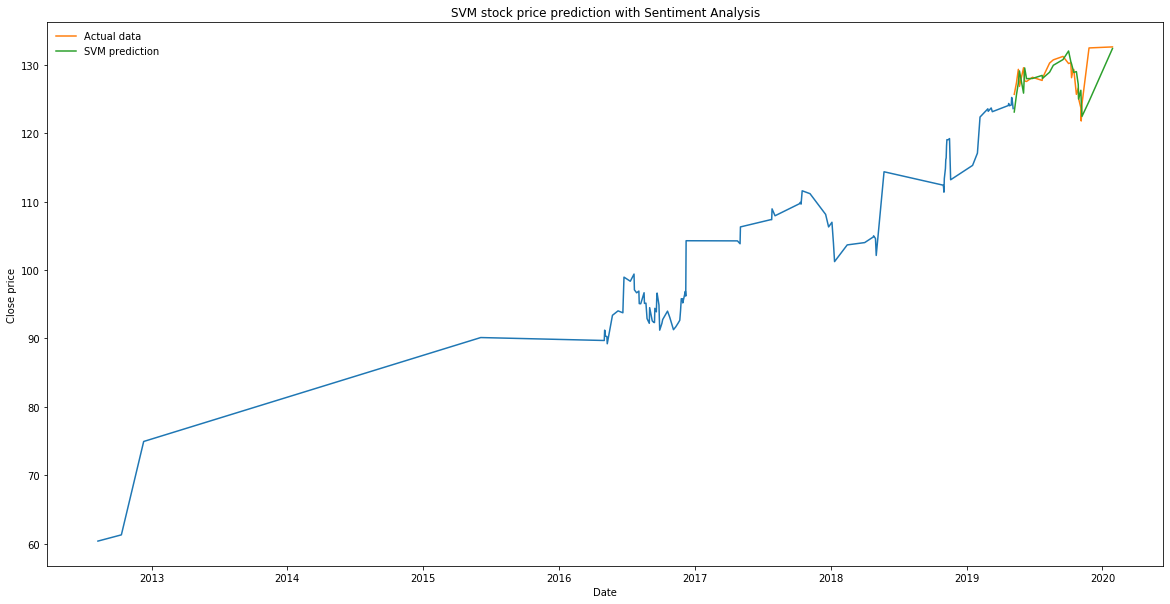

Support Vector Machine model Root mean square error 2.305379966775499
svm confidence:  0.21577754210089936


In [49]:
title_data = myfunc(merged_title, 'DTE')
merged = getStockData(title_data)
predict(merged)

## Technical analysis

In [52]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [58]:
def onBalanceVolume(df):
    #Calculate the On Balance Volume
    OBV = []
    OBV.append(0)
    for i in range(1, len(df.Close)):
        if df.Close[i] > df.Close[i-1]: #If the closing price is above the prior close price 
              OBV.append(OBV[-1] + df.Volume[i]) #then: Current OBV = Previous OBV + Current Volume
        elif df.Close[i] < df.Close[i-1]:
              OBV.append( OBV[-1] - df.Volume[i])
        else:
              OBV.append(OBV[-1])
    return OBV

<ipython-input-64-d1784ce4c0fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['release_date'] = selected_data['release_date'].astype('datetime64[ns]')


[*********************100%***********************]  1 of 1 completed


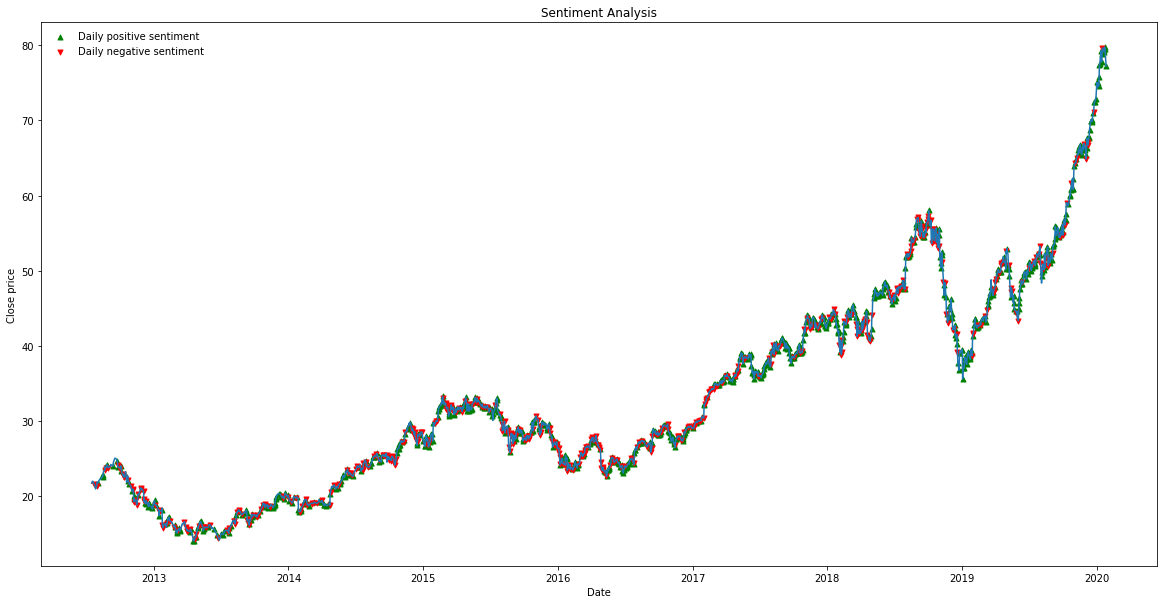

                 Open       High        Low      Close  Adj Close     Volume  \
date                                                                           
2012-08-21  23.957857  24.102858  23.226070  23.430714  20.269014  812719600   
2012-08-22  23.372143  23.892857  23.146786  23.888214  20.664780  565322800   
2012-08-23  23.789642  23.924999  23.612499  23.665358  20.471992  420128800   
2012-08-27  24.285357  24.316786  24.055000  24.131430  20.875175  427008400   
2012-08-28  24.106428  24.146429  23.952499  24.100000  20.847988  267416800   
...               ...        ...        ...        ...        ...        ...   
2020-01-21  79.297501  79.754997  79.000000  79.142502  78.347801  110843200   
2020-01-22  79.644997  79.997498  79.327499  79.425003  78.627464  101832400   
2020-01-23  79.480003  79.889999  78.912498  79.807503  79.006119  104472000   
2020-01-24  80.062500  80.832497  79.379997  79.577499  78.778435  146537600   
2020-01-27  77.514999  77.942497  76.220

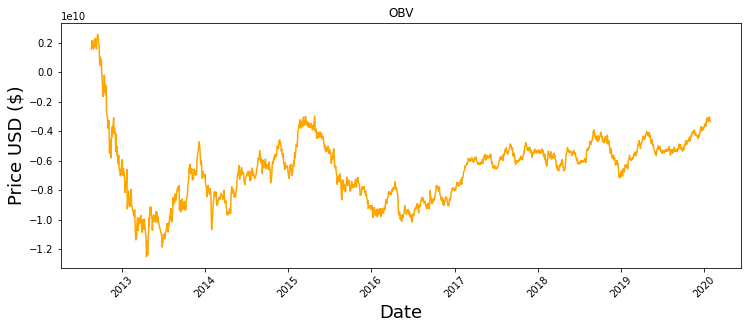

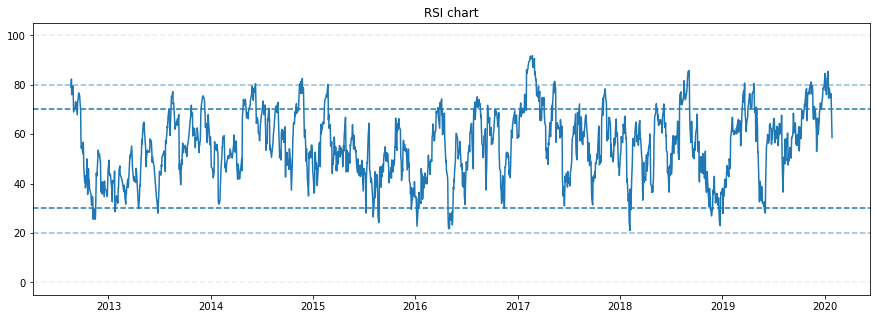

<ipython-input-64-d1784ce4c0fc>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['lr_prediction'] =lr_model.predict(x_test)


Linear Model Root mean square error 0.9227311581474213
lr confidence:  0.9911261797398064


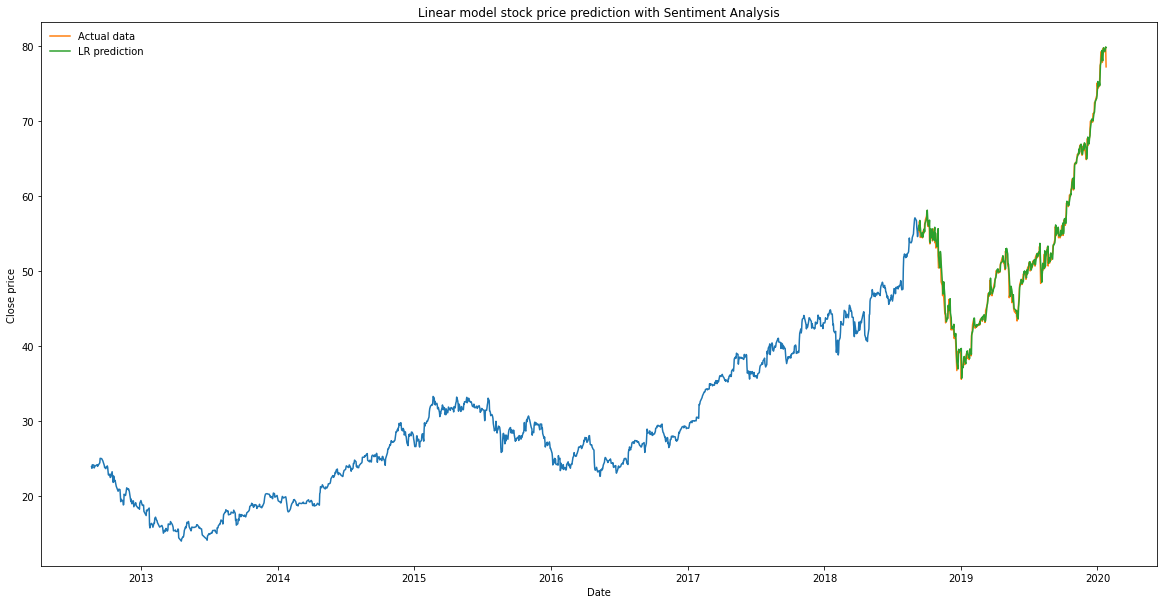

/home/etax/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-64-d1784ce4c0fc>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['svm_prediction'] = svm_model.predict(x_test)


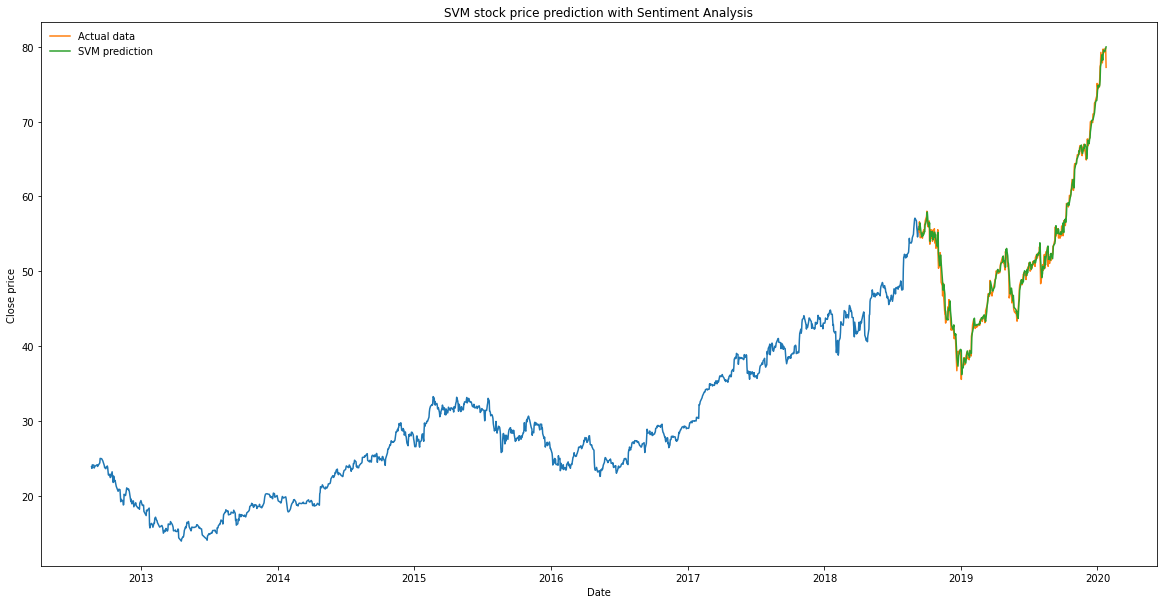

Support Vector Machine model Root mean square error 0.9252710980063894
svm confidence:  0.9910772597692771


In [64]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error , r2_score

def predict(merged):
    merged['date'] = merged['release_date']
    df_aapl = merged[['date', 'Open', 'High', 'Low','Close','Adj Close', 'Volume', 'polarity','subjectivity','positivity','negativity']]
    df_aapl = df_aapl.set_index('date')
    df_aapl['MA_3'] = df_aapl.iloc[:,1].rolling(window=3).mean()
    df_aapl['MA_5'] = df_aapl.iloc[:,1].rolling(window=5).mean()
    df_aapl['RSI'] = computeRSI(df_aapl['Adj Close'], 14)
    df_aapl['OBV'] = onBalanceVolume(df_aapl)
    df_aapl.dropna(inplace=True)
    print(df_aapl)
    
    plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
    plt.plot( df_aapl['OBV'],  label='OBV', color= 'orange')
    plt.xticks(rotation=45) 
    plt.title('OBV')
    plt.xlabel('Date',fontsize=18)
    plt.ylabel('Price USD ($)',fontsize=18)
    plt.show()

    # plot correspondingRSI values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('RSI chart')
    plt.plot(df_aapl['RSI'])

    plt.axhline(0, linestyle='--', alpha=0.1)
    plt.axhline(20, linestyle='--', alpha=0.5)
    plt.axhline(30, linestyle='--')

    plt.axhline(70, linestyle='--')
    plt.axhline(80, linestyle='--', alpha=0.5)
    plt.axhline(100, linestyle='--', alpha=0.1)
    plt.show()
    
    df_aapl['Prediction'] = df_aapl[['Close']].shift(-1)
    X = df_aapl.drop(['Prediction'], 1)
    X = X[:-1]
    Y = df_aapl.head(-1)[['Prediction']]
    x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2, shuffle = False)
    
    lr_model=LinearRegression()
    lr_model.fit(x_train,y_train)
    
    y_test['lr_prediction'] =lr_model.predict(x_test)
    
    lr_rmse=math.sqrt(mean_squared_error(y_test['Prediction'],y_test['lr_prediction']))
    print('Linear Model Root mean square error',lr_rmse)
    
    lr_confidence = lr_model.score(x_test, y_test['Prediction'])
    print("lr confidence: ", lr_confidence)
    
    plt.plot(y_train["Prediction"])
    plt.plot(y_test['Prediction'], label = 'Actual data')
    plt.plot(y_test['lr_prediction'], label = 'LR prediction')
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.title("Linear model stock price prediction with Sentiment Analysis")
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

    x_train = scaling.transform(x_train)
    x_test = scaling.transform(x_test)

    svr_rbf = SVR(kernel='linear')
    svm_model=svr_rbf.fit(x_train,y_train)
    
    y_test['svm_prediction'] = svm_model.predict(x_test)
    
    ret_object = {'x': y_train,'y': y_test}
    
    plt.plot(y_train["Prediction"])
    plt.plot(y_test['Prediction'], label = 'Actual data')
    plt.plot(y_test['svm_prediction'], label = 'SVM prediction')
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.title("SVM stock price prediction with Sentiment Analysis")
    plt.legend(loc='upper left', frameon=False)
    plt.show()
    
    svm_rmse=math.sqrt(mean_squared_error(y_test['Prediction'],y_test['svm_prediction']))
    print('Support Vector Machine model Root mean square error',svm_rmse)
    
    svm_confidence = svr_rbf.score(x_test, y_test['Prediction'])
    print("svm confidence: ", svm_confidence)
    
    return ret_object
    
title_data = myfunc(merged_title, 'AAPL')
merged = getStockData(title_data)

appl_pred = predict(merged)
